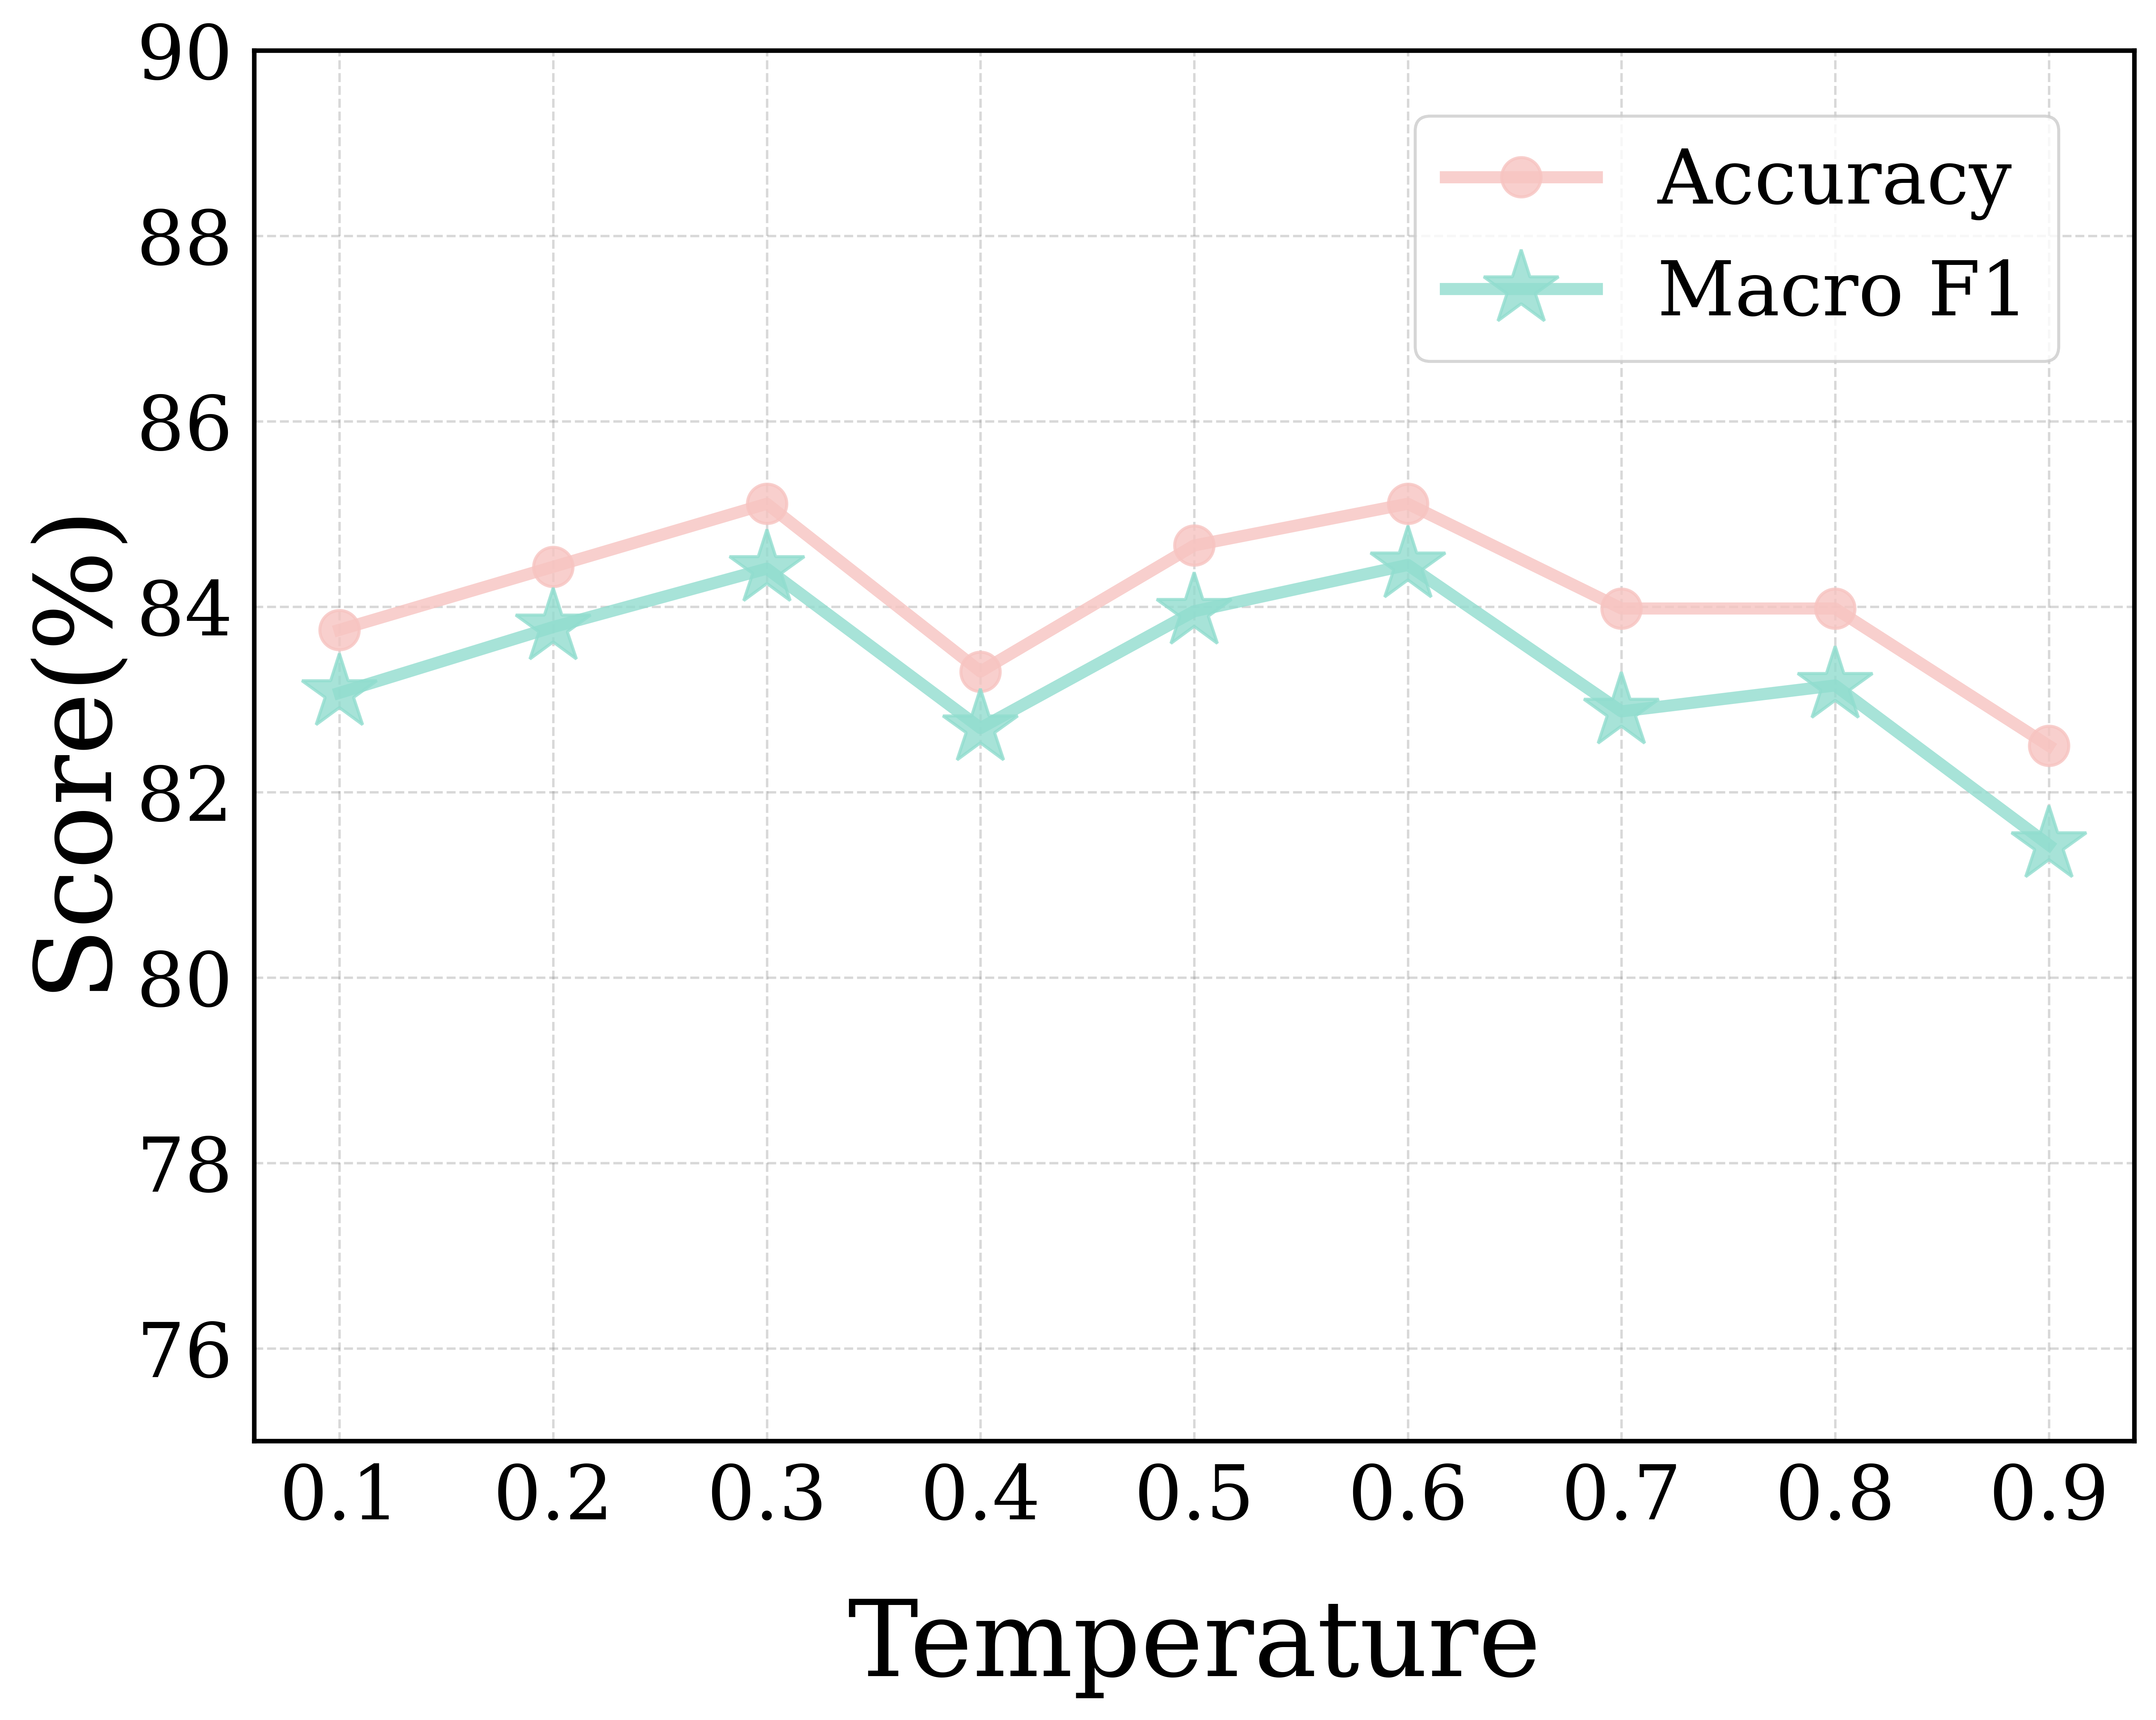

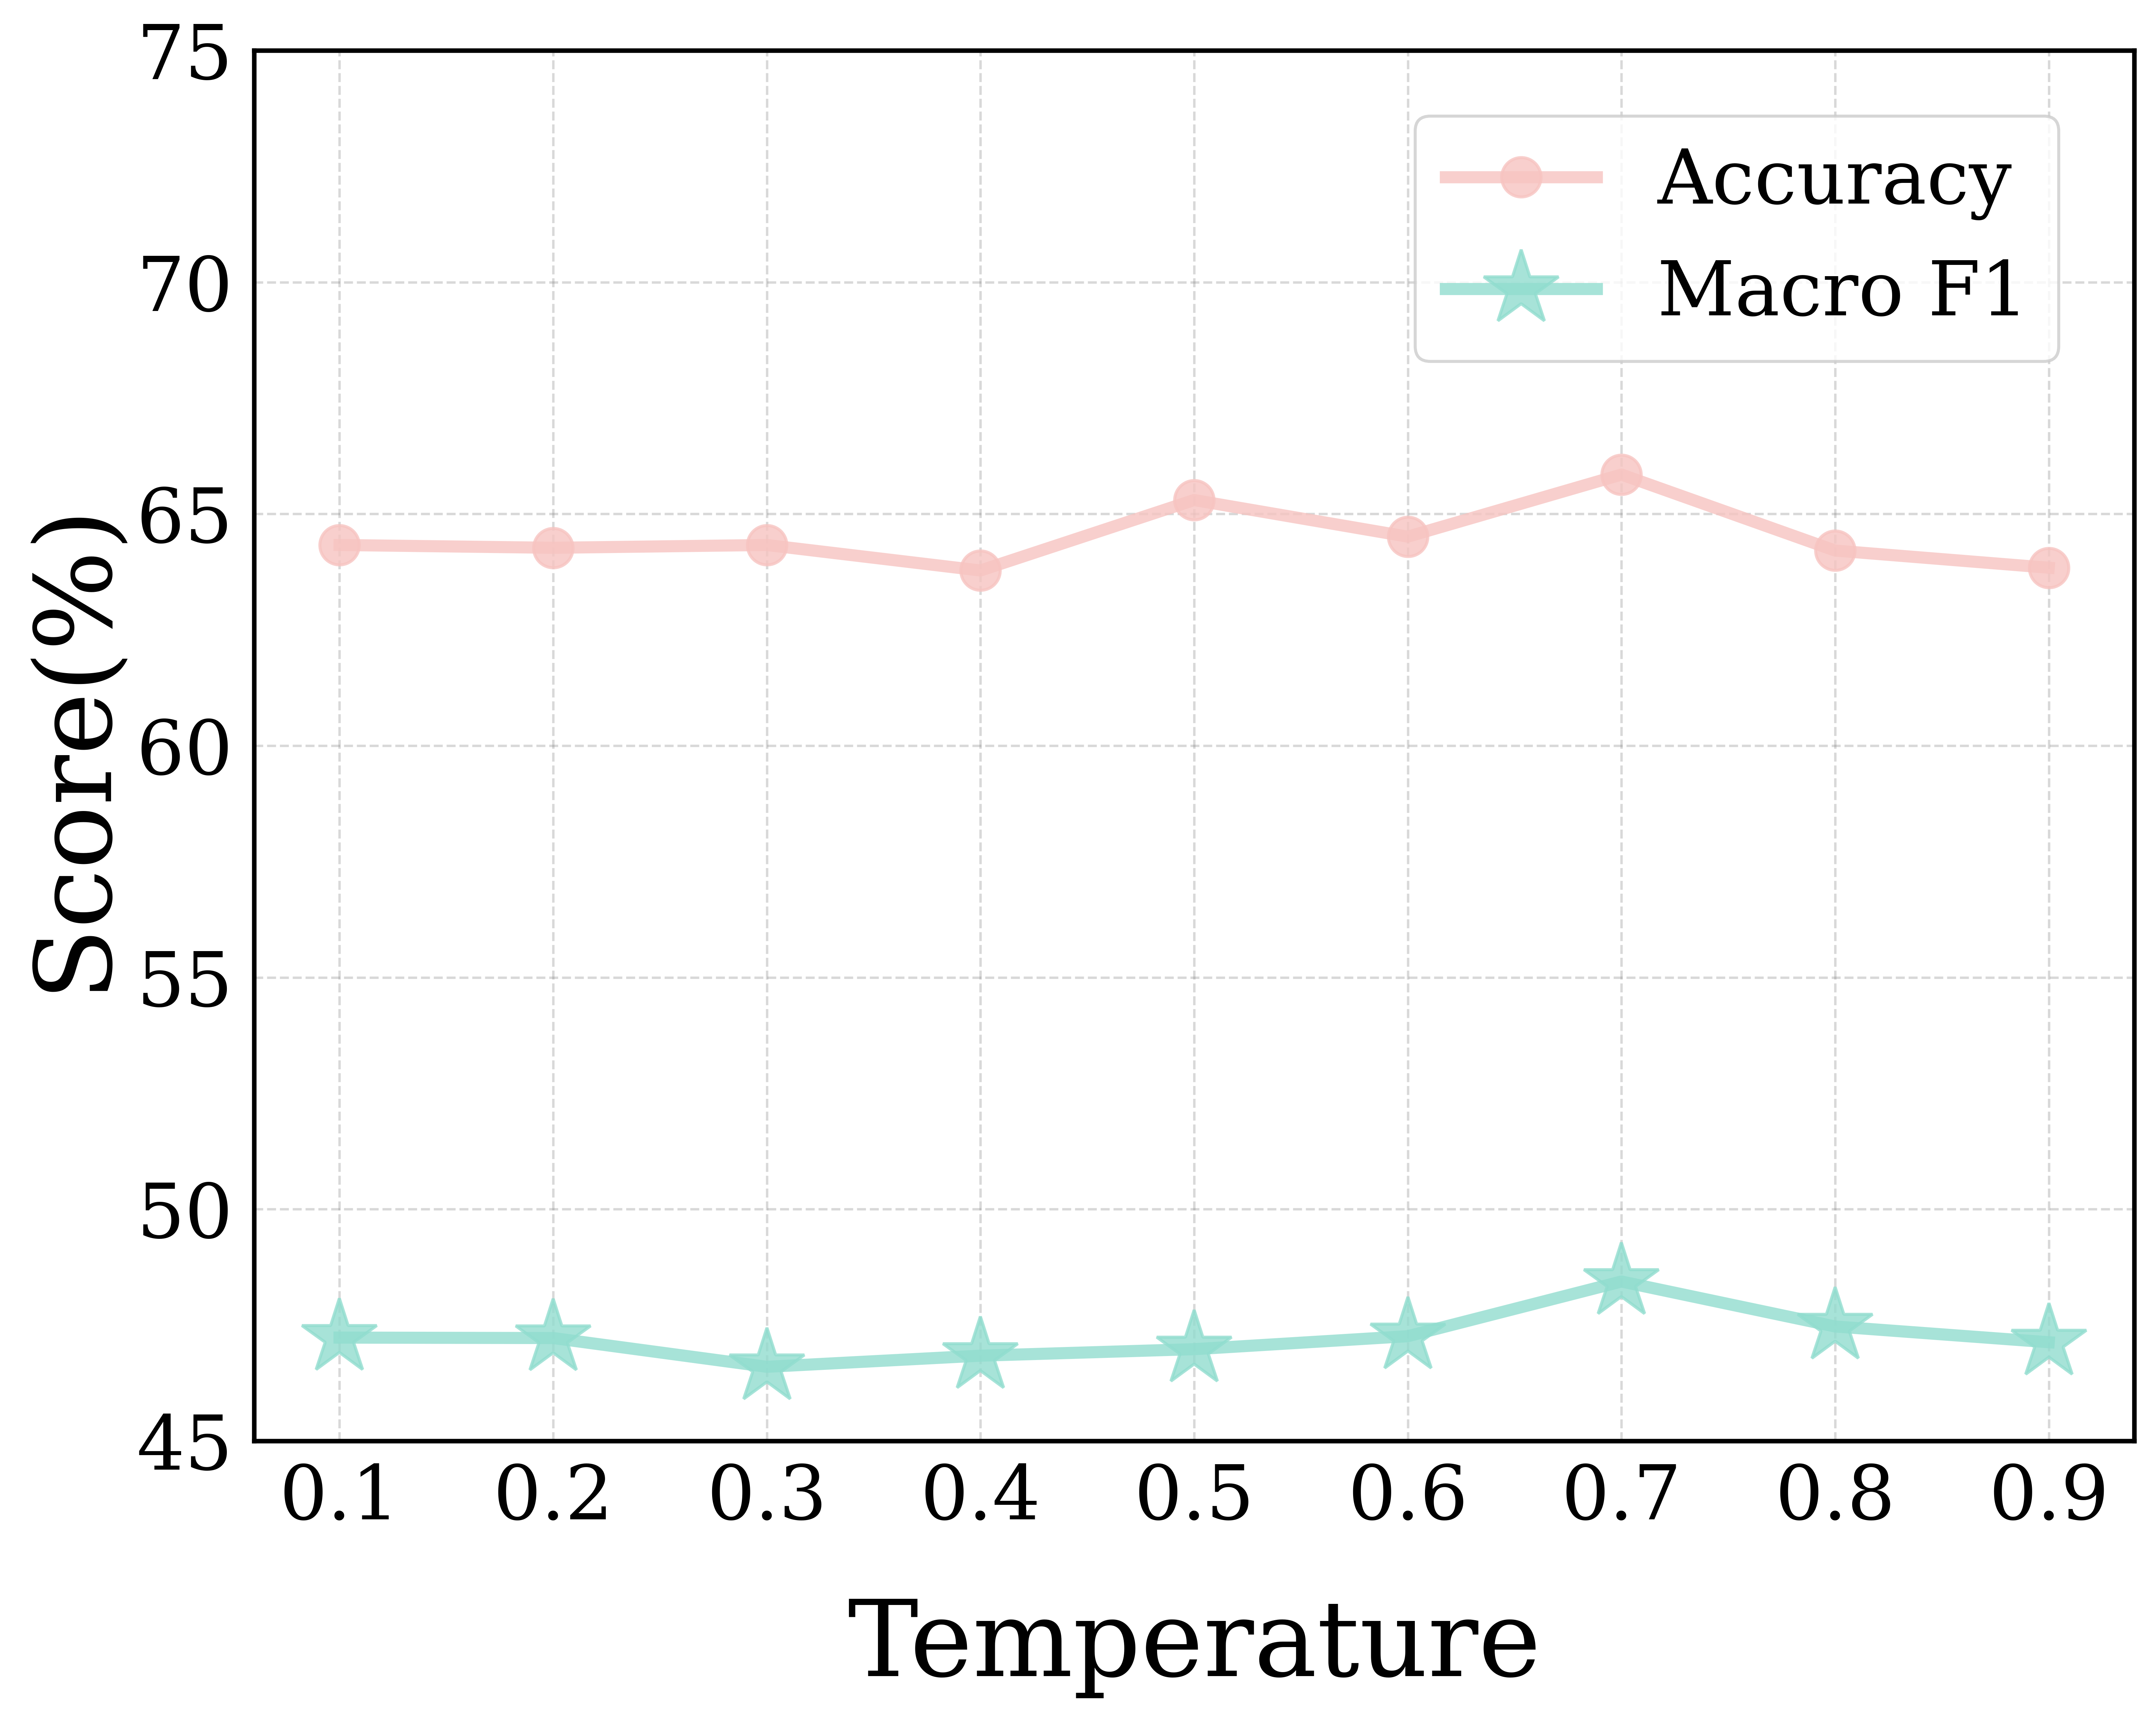

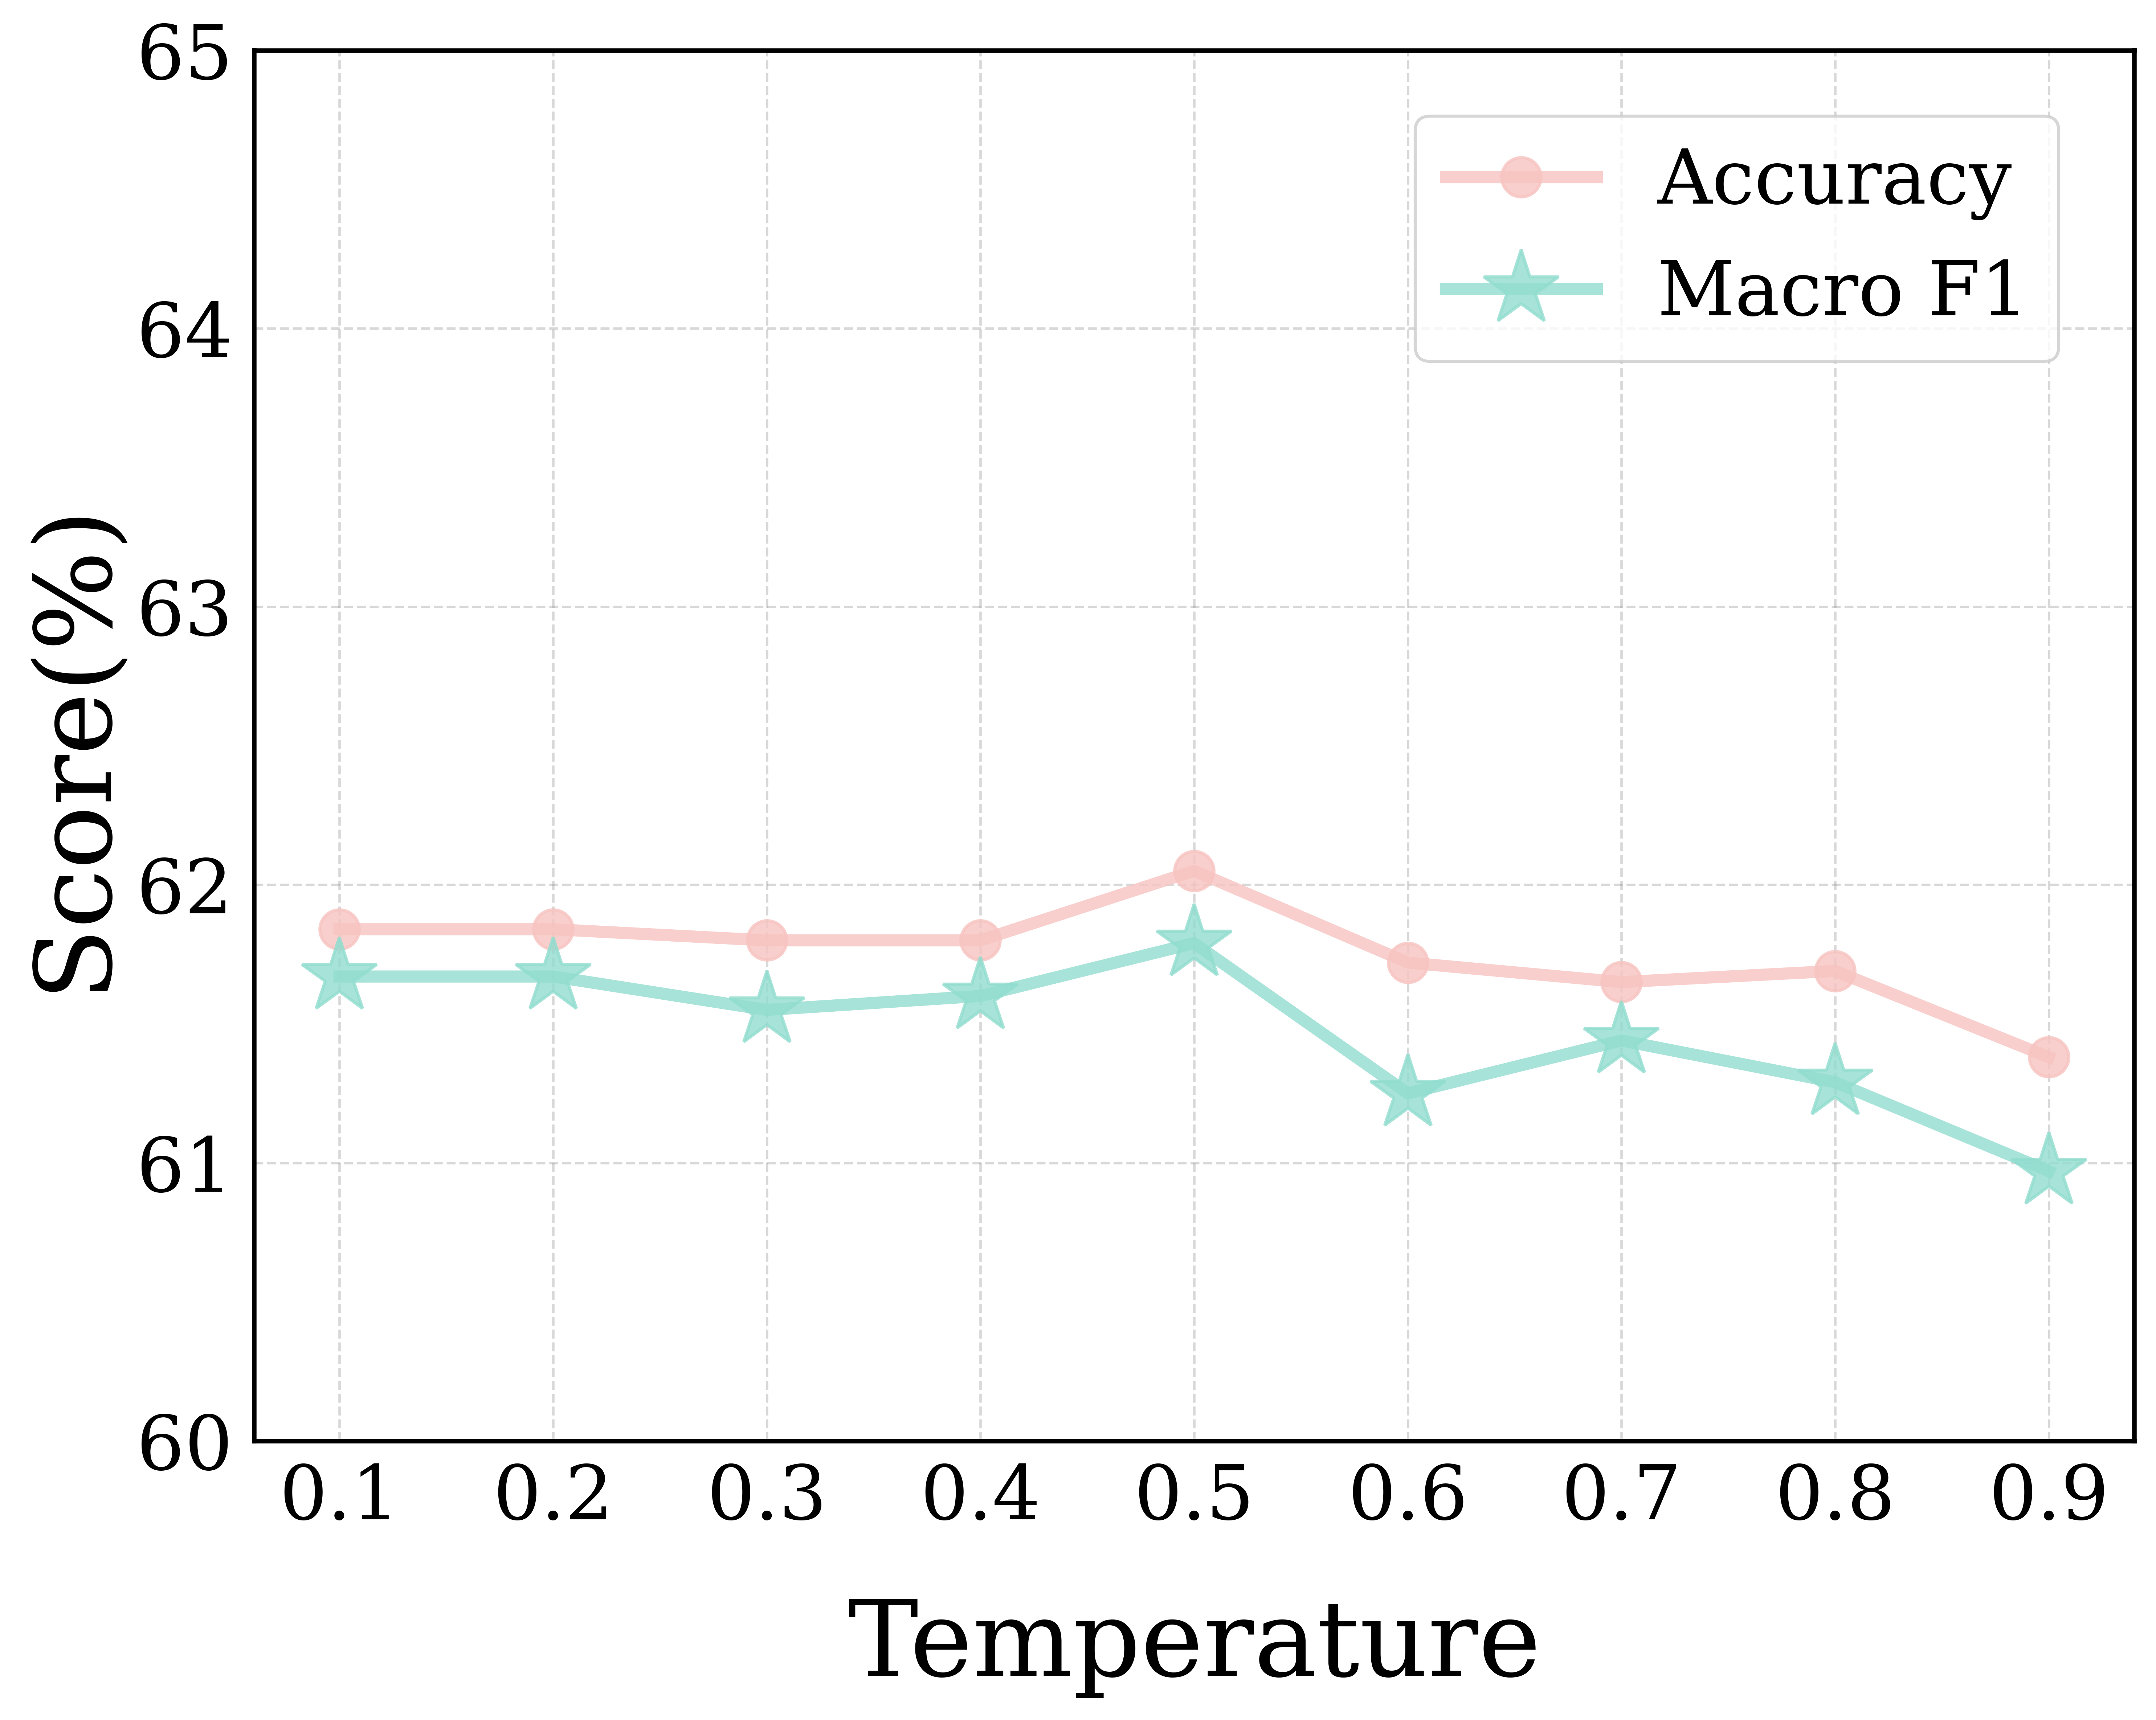

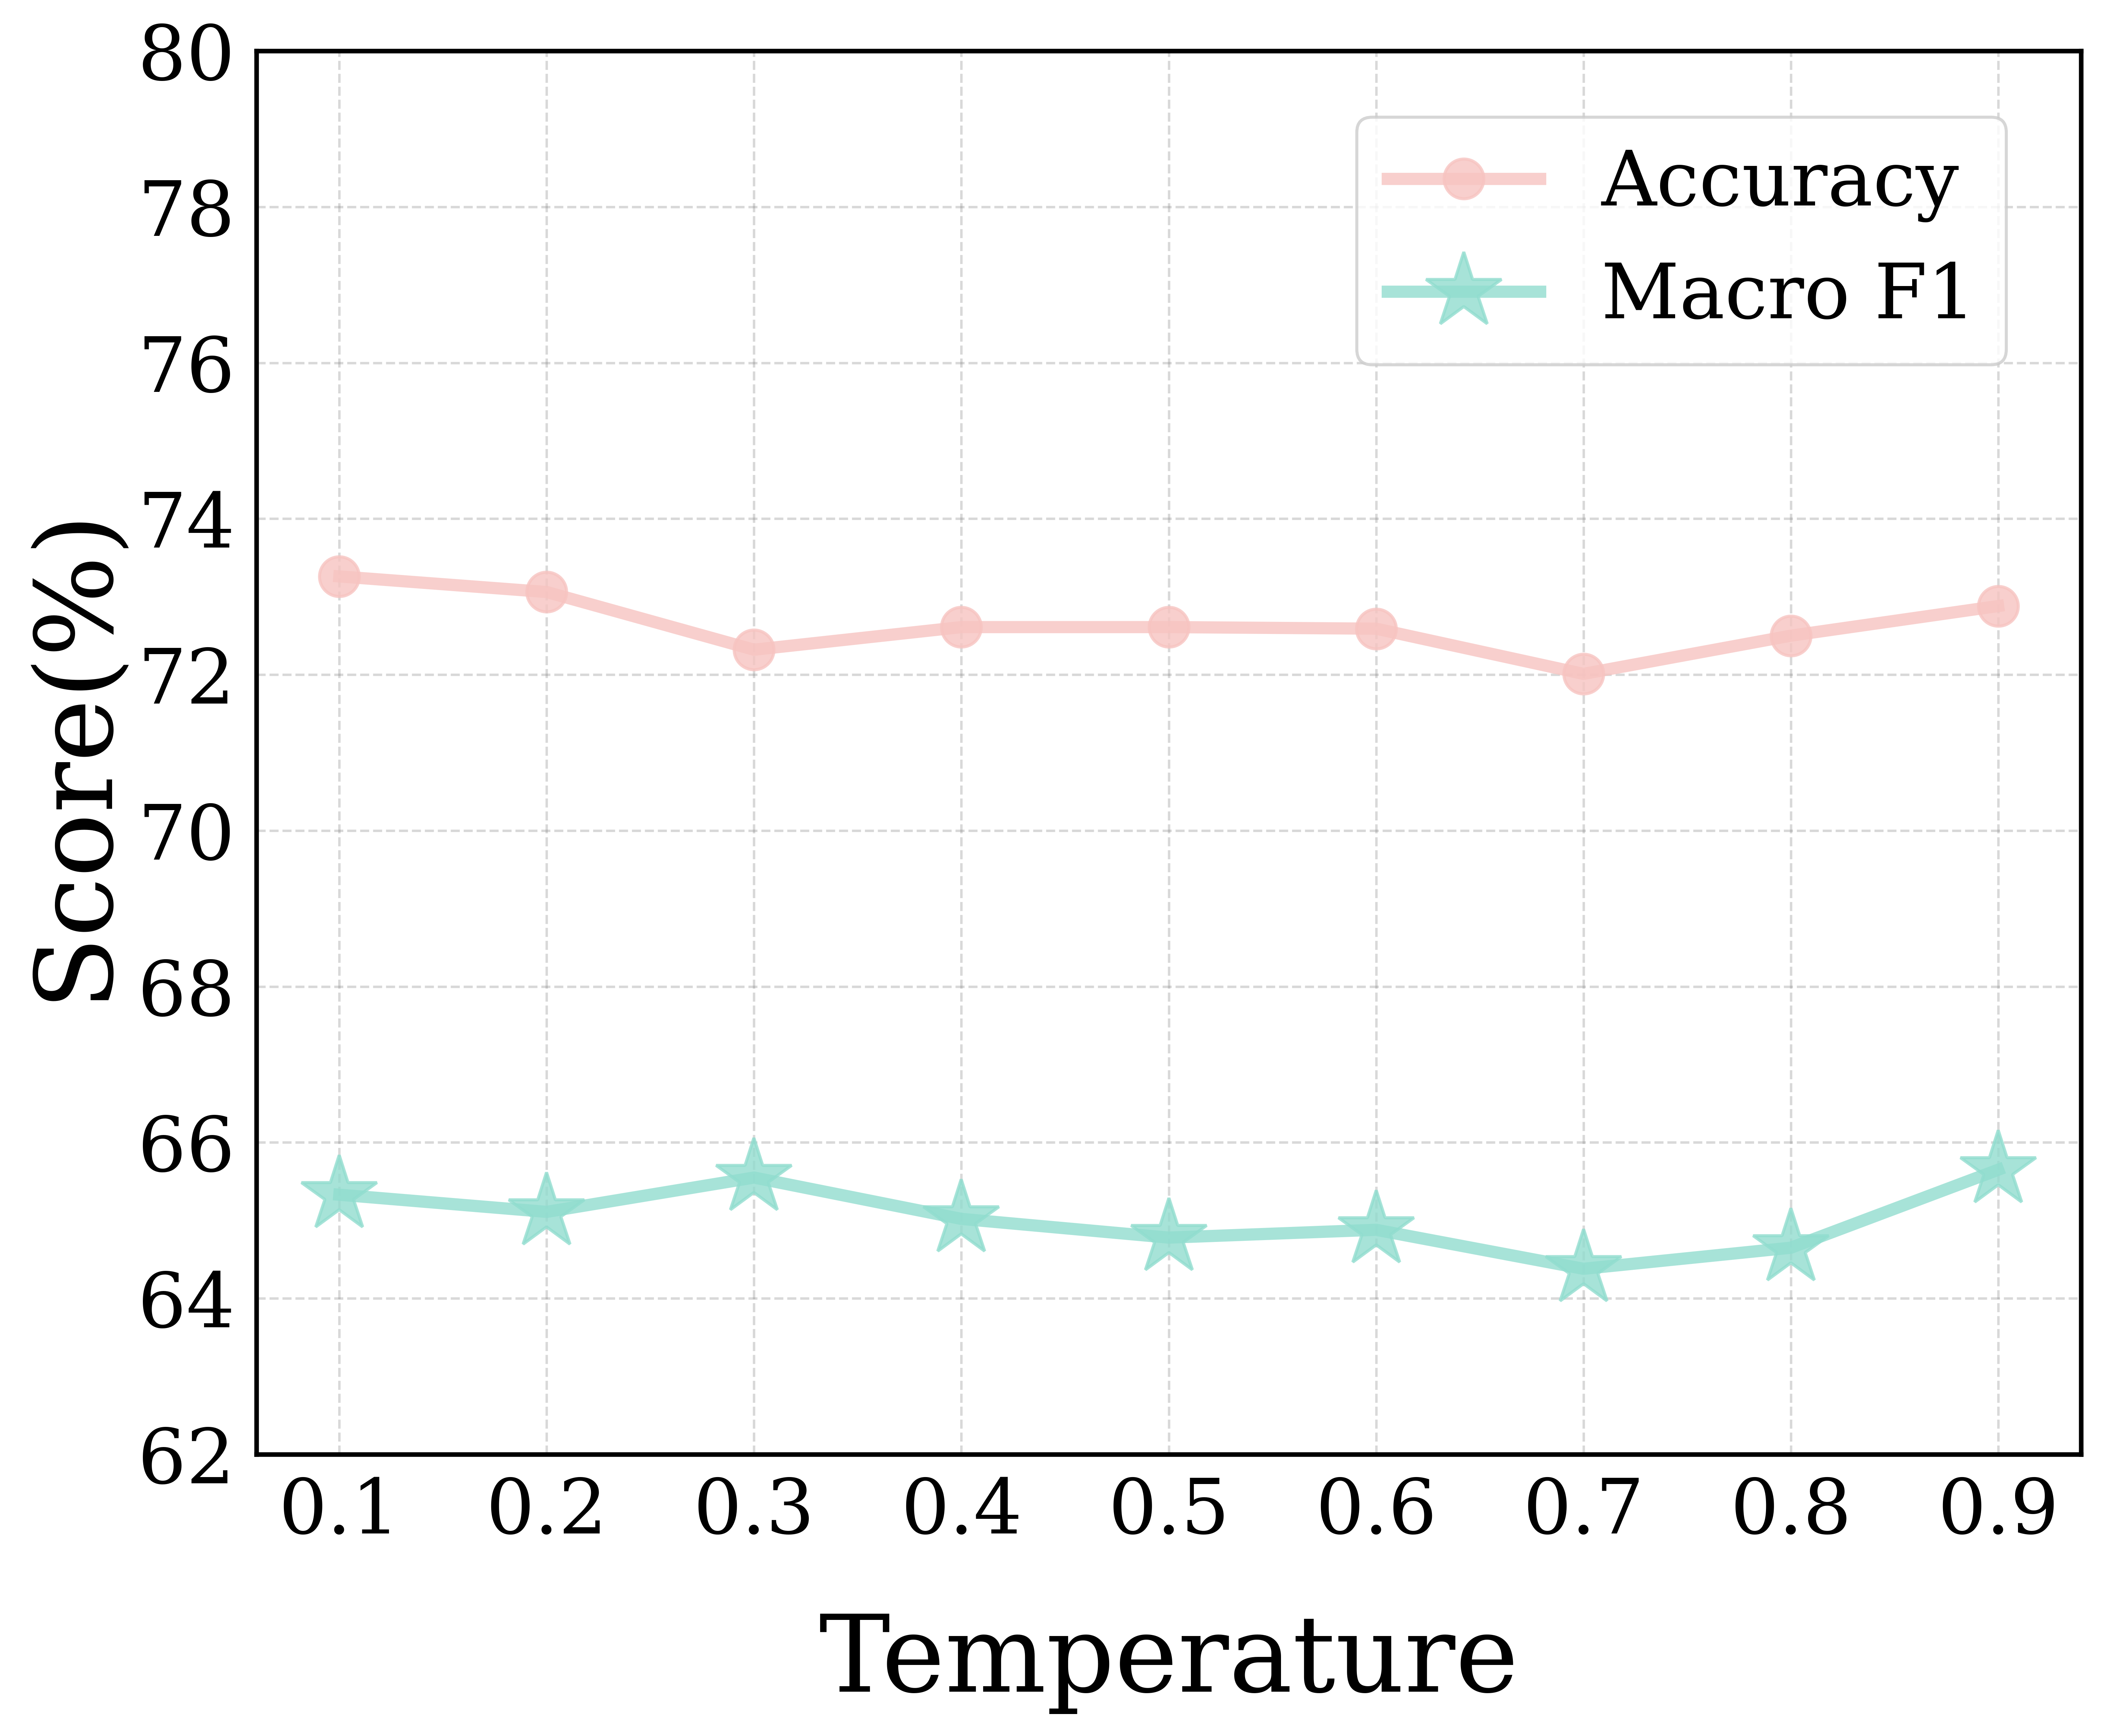

In [45]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
from scipy.interpolate import make_interp_spline
from scipy.ndimage import gaussian_filter1d

def set_style():
    """Set global matplotlib style parameters"""
    mpl.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.linewidth'] = 1.5
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['figure.figsize'] = (12, 10)

# Global configuration
PLOT_CONFIG = {
    'fontsize': 30,  # 标签字体大小
    'ticksize': 25,  # 刻度字体大小
    'titlesize': 35,
    'font': {
        'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 35,
    },
    'colors': {
        0: '#F7C4C1CC',
        1: '#91DDCFCC',
        2: '#E3C6E0CC',
        3: '#4DBBD5CC',
},
    
    'linewidth': 4,
    'markersize': 26,
    'y1_range': (0,800),
    'y2_range': (0,2500),
    'y3_range': (0,8000)# 右侧Y轴范围
}

def create_plot_data():
    """Create two different plot configurations"""
    return [
        {
            #cora
            'labels': ['0.1','0.2', '0.3', '0.4', '0.5', '0.6','0.7', '0.8','0.9'],
            'map1': [83.75, 84.43, 85.11, 83.30, 84.66, 85.11, 83.98, 83.98, 82.50],  # MMLU 30
            'map2': [83.07, 83.78, 84.41, 82.69, 83.95, 84.45, 82.87, 83.15, 81.43],  # MMLU 50
            'xlabel': r'Temperature',
            'ylabel': r'Score(%)',  # Y轴标签
            'output': 'figures/tau_mutag.pdf',
            'y_range': (75,90), # Y轴范围
            'title': 'MUTAG'
        },
        {
            'labels': ['0.1','0.2', '0.3', '0.4', '0.5', '0.6','0.7', '0.8','0.9'],
            'map1': [64.33, 64.27, 64.33, 63.78, 65.30, 64.51, 65.85, 64.21, 63.84],
            'map2': [47.23, 47.22, 46.60, 46.84, 46.98, 47.26, 48.44, 47.47, 47.13],
            'xlabel': r'Temperature',
            'ylabel': r'Score(%)',  # Y轴标签
            'output': 'figures/tau_ptcmr.pdf',
            'y_range': (45,75),
            'title': 'PTC-MR'
        },
        {
           'labels': ['0.1','0.2', '0.3', '0.4', '0.5', '0.6','0.7', '0.8','0.9'],
            'map1': [61.84, 61.84, 61.80, 61.80, 62.05, 61.72, 61.65, 61.69, 61.38],
            'map2': [61.67, 61.67, 61.55, 61.60, 61.79, 61.25, 61.44, 61.29, 60.97],
            'xlabel': r'Temperature',
            'ylabel': r'Score(%)',  # Y轴标签
            'output': 'figures/tau_dhfr.pdf',
            'y_range': (60,65),
            'title': 'DHFR'
        },
        {
           'labels': ['0.1','0.2', '0.3', '0.4', '0.5', '0.6','0.7', '0.8','0.9'],
            'map1': [73.26, 73.06, 72.32, 72.61, 72.61, 72.59, 72.01, 72.50, 72.88],
            'map2': [65.33, 65.11, 65.55, 65.02, 64.78, 64.88, 64.38, 64.65, 65.65],
            'xlabel': r'Temperature',
            'ylabel': r'Score(%)',  # Y轴标签
            'output': 'figures/tau_proteins.pdf',
            'y_range': (62,80),
            'title': 'PROTEINS'          
        }        
     
    ]

def create_plot(plot_data):
    """Create a single plot with the given data"""
    # plt.gcf().subplots_adjust(left=0.16, bottom=0.18)
    fig, ax = plt.subplots(figsize=(10, 8), dpi=600)

    # Set grid
    # ax.grid(ls='--')
    ax.grid(ls='--', color='gray', alpha=0.3)

    # Create lines
    ax.plot(plot_data['labels'], plot_data['map1'],
            marker='.',
            linewidth=PLOT_CONFIG['linewidth'],
            linestyle='-',
            markersize=PLOT_CONFIG['markersize'],
            color=PLOT_CONFIG['colors'][0],
            label=r'Accuracy',
            clip_on=False)
    
    ax.plot(plot_data['labels'], plot_data['map2'],
            marker='*',
            linewidth=PLOT_CONFIG['linewidth'],
            linestyle='-',
            markersize=PLOT_CONFIG['markersize'],
            color=PLOT_CONFIG['colors'][1],
            label= r'Macro F1',
            clip_on=False)
    ax.set_xlabel(plot_data['xlabel'], 
                 fontdict=PLOT_CONFIG['font'], labelpad=20)
    
    # 设置Y轴标签
    ax.set_ylabel(plot_data.get('ylabel', r'Sample Size'), 
                 fontdict=PLOT_CONFIG['font'])

    # 设置Y轴范围
    y_range = plot_data.get('y_range', (0, 1))
    ax.set_ylim(y_range)
    #ax.set_title(plot_data['title'], fontsize=PLOT_CONFIG['fontsize'])
    
    # 设置刻度字体大小
    ax.tick_params(bottom=False,
                  top=False,
                  left=False,
                  right=False,
                  labelsize=PLOT_CONFIG.get('ticksize', PLOT_CONFIG['fontsize']))
    
    # 创建图例
    legend = ax.legend(loc='upper right',  
                      bbox_to_anchor=(0.98, 0.98),  
                      fontsize=25,  # 与柱状图一致的图例字体大小
                      ncol=1,  
                      frameon=True)

    # Save plot
    plt.tight_layout()
    plt.savefig(plot_data['output'], bbox_inches='tight')
    #plt.close()

def main():
    set_style()
    plot_data_list = create_plot_data()
    for plot_data in plot_data_list:
        create_plot(plot_data)

if __name__ == "__main__":
    main()

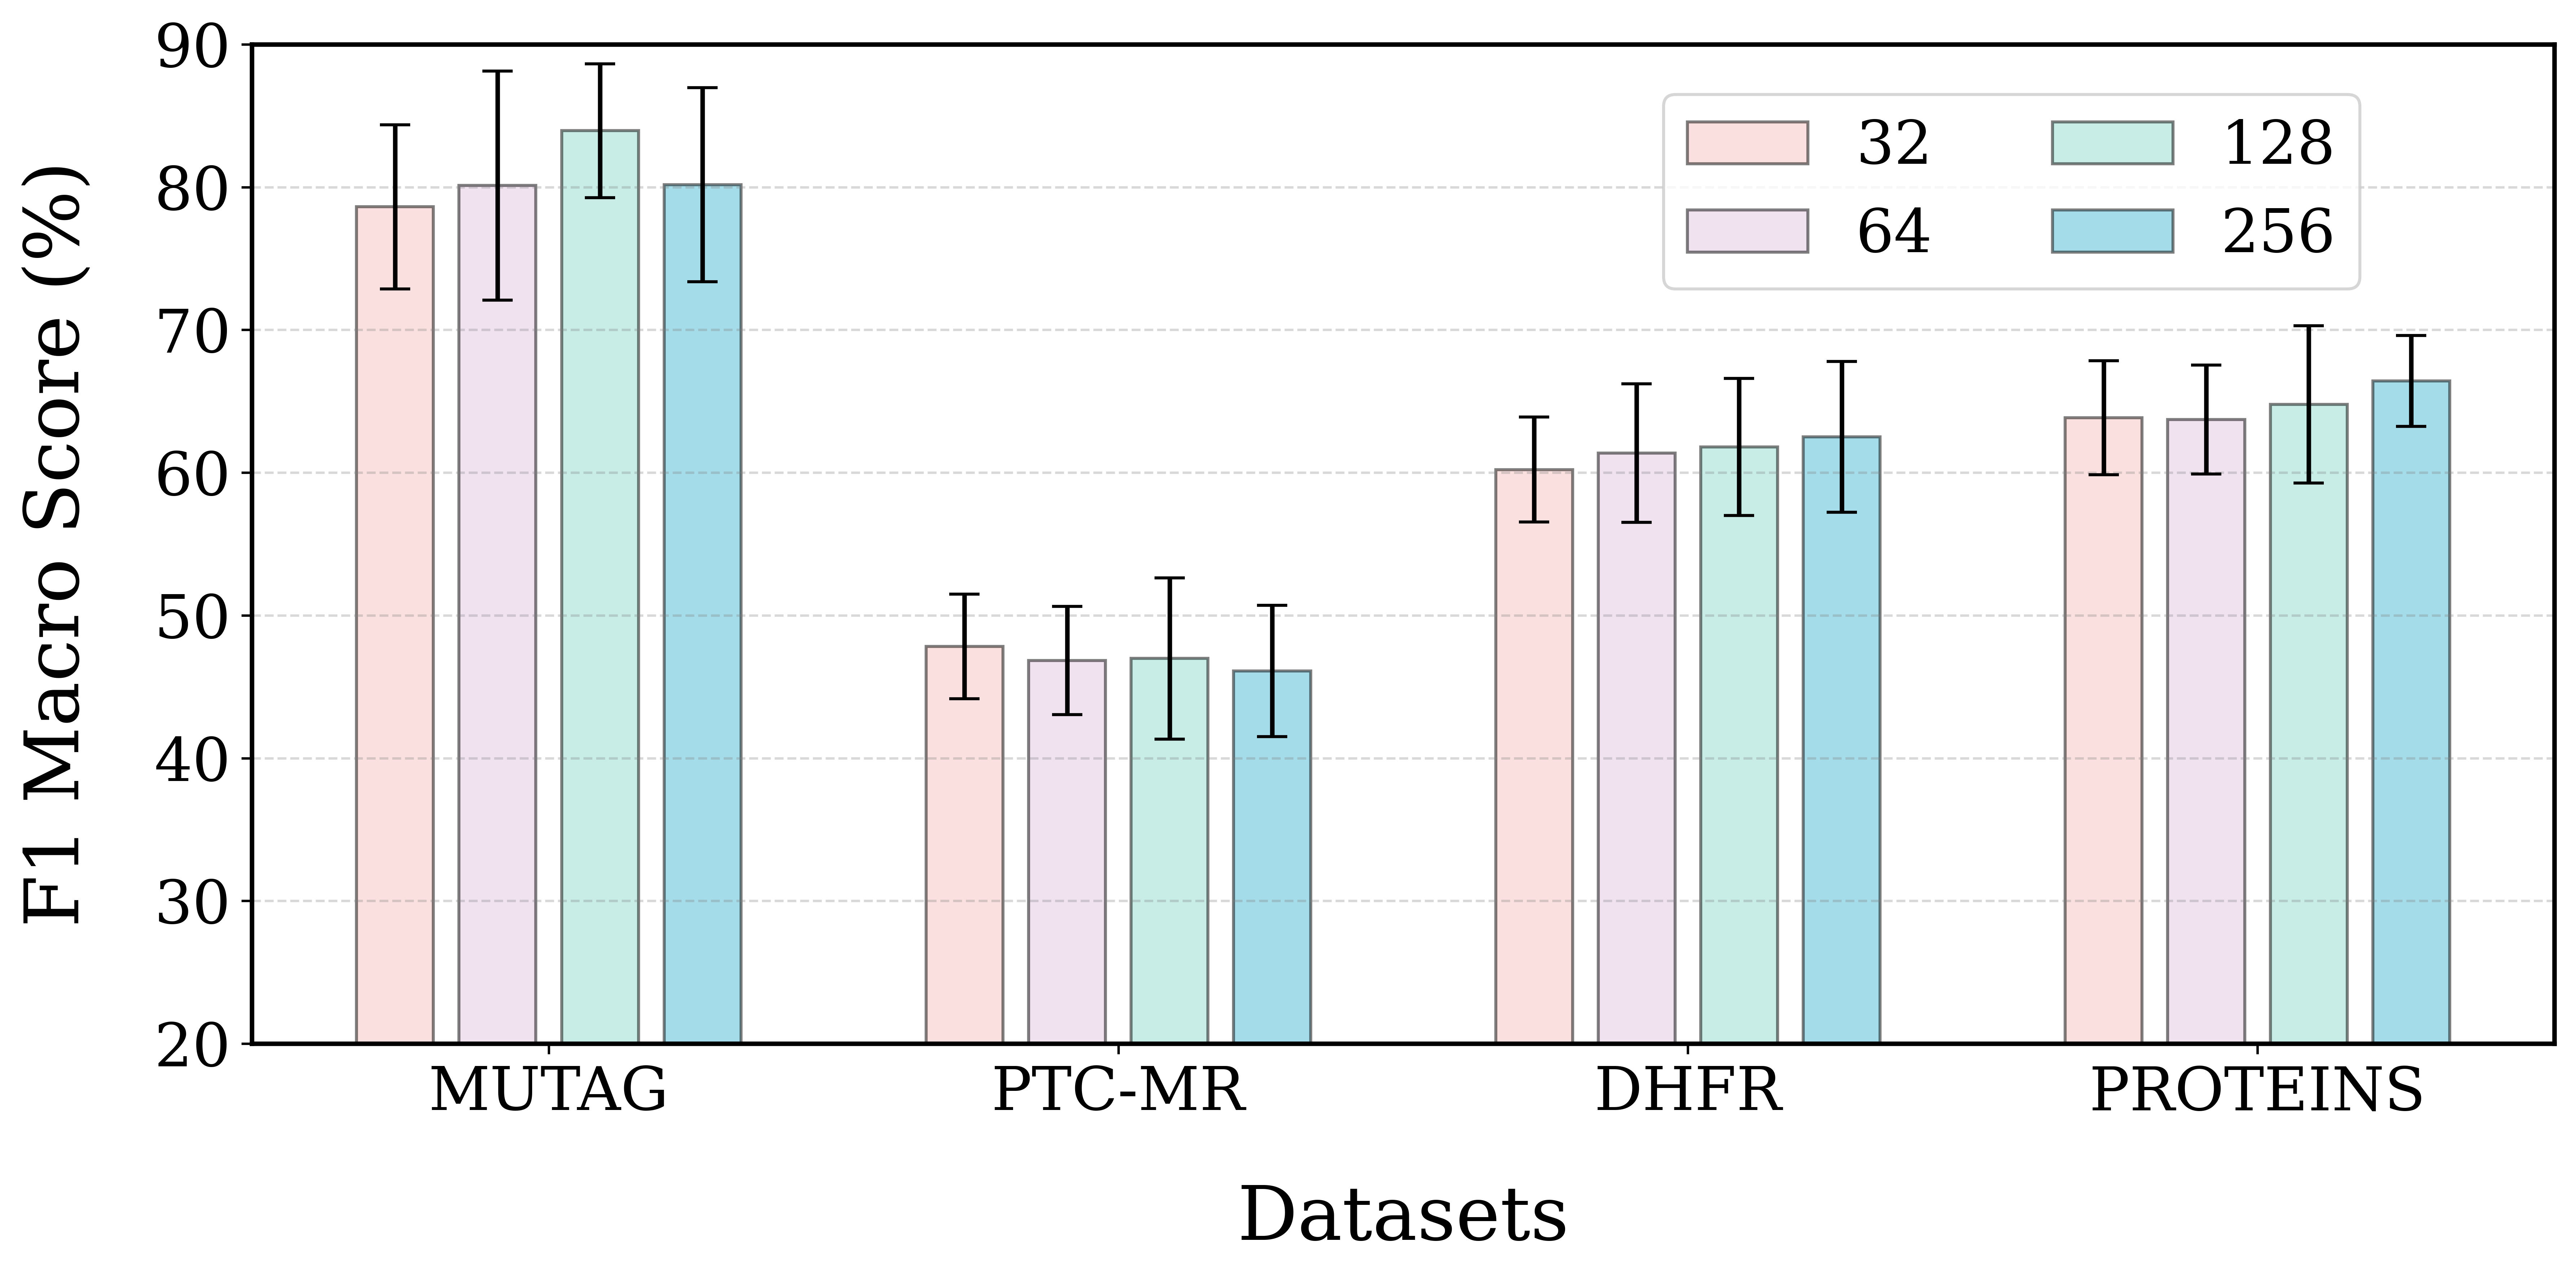

In [48]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
from scipy.interpolate import make_interp_spline
from scipy.ndimage import gaussian_filter1d
import numpy as np

def set_style():
    """Set global matplotlib style parameters"""
    mpl.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.linewidth'] = 1.5
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['figure.figsize'] = (12, 4)

# Global configuration
PLOT_CONFIG = {
    'fontsize': 25,  # 标签字体大小
    'ticksize': 20,  # 刻度字体大小
    'titlesize': 25,
    'font': {
        'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 25,
    },
    'colors': {
        0: '#F7C4C1CC',  # 32
        2: '#91DDCFCC',  # 64
        1: '#E3C6E0CC',  # 128
        3: '#4DBBD5CC',  # 256
    },
    
    'linewidth': 4,
    'markersize': 26,
    'bar_width': 0.2,  # 柱状图宽度
    'y_range': (20, 90), # Y轴范围
}

def create_bar_plot_data():
    """Create data for bar plot"""
    datasets = ['MUTAG', 'PTC-MR', 'DHFR', 'PROTEINS']
    hidden_dims = ['32', '64', '128', '256']
    
    # 数据格式: [dataset_index][hidden_dim_index] = (mean, std)
    data = [
        {  # MUTAG
            0: (78.62, 5.75),  # 32
            1: (80.11, 8.03),  # 64
            2: (83.95, 4.68),  # 128
            3: (80.17, 6.79),  # 256
        },
        {  # PTC-MR
            0: (47.83, 3.66),
            1: (46.84, 3.80),
            2: (46.98, 5.64),
            3: (46.10, 4.60),
        },
        {  # DHFR
            0: (60.21, 3.68),
            1: (61.37, 4.85),
            2: (61.79, 4.80),
            3: (62.51, 5.28),
        },
        {  # PROTEINS
            0: (63.85, 4.00),
            1: (63.72, 3.82),
            2: (64.78, 5.50),
            3: (66.42, 3.19),
        }
    ]
    
    return datasets, hidden_dims, data

def create_bar_plot(datasets, hidden_dims, data):
    fig, ax = plt.subplots(figsize=(12, 6), dpi=600)

    n_datasets = len(datasets)
    n_dims = len(hidden_dims)
    bar_width = PLOT_CONFIG['bar_width']  # 单个柱子宽度，如 0.2

    x = np.arange(n_datasets)  # 每个 dataset 的中心位置，如 0, 1, 2, 3

    bars = []
    small_spacing = bar_width * 0.9  # 组内柱子之间的小间距，可调整！！
    
    for i, dim in enumerate(hidden_dims):
        means = [data[j][i][0] for j in range(n_datasets)]
        stds = [data[j][i][1] for j in range(n_datasets)]
        colors_dim = PLOT_CONFIG['colors'][i]

        # 对于每个 dataset j，它的第 i 个 hidden_dim 的柱子位置为：
        # x[j] - (n_dims-1)/2 * small_spacing  +  i * small_spacing
        x_positions = []
        for j in range(n_datasets):
            base_x = x[j]
            start_x = base_x - (n_dims - 1) * small_spacing / 2
            x_pos = start_x + i * small_spacing
            x_positions.append(x_pos)

        # 绘制柱子
        bar = ax.bar(x_positions, means, width=small_spacing * 0.75, 
                     yerr=stds, capsize=5,
                     color=PLOT_CONFIG['colors'][i], label=f'{dim}', alpha=0.5,
                     edgecolor='black', linewidth=1)
        bars.append(bar)

    # x轴刻度放在 dataset 的中心
    ax.set_xticks(x)
    ax.set_xticklabels(datasets, fontsize=PLOT_CONFIG['ticksize'])

    ax.set_xlabel('Datasets', fontdict=PLOT_CONFIG['font'], labelpad=20)
    ax.set_ylabel(r'F1 Macro Score (%)', fontdict=PLOT_CONFIG['font'], labelpad=20)
    ax.set_ylim(PLOT_CONFIG['y_range'])
    ax.tick_params(axis='both', which='major', labelsize=PLOT_CONFIG['ticksize'])
    ax.grid(ls='--', color='gray', alpha=0.3, axis='y')
    ax.legend(loc='upper left', bbox_to_anchor=(0.6, 0.98), fontsize=20, ncol=2, frameon=True)

    plt.tight_layout()
    plt.savefig('figures/f1_macro_hidden.pdf', bbox_inches='tight')
    #plt.close()
def main():
    set_style()
    datasets, hidden_dims, data = create_bar_plot_data()
    create_bar_plot(datasets, hidden_dims, data)

if __name__ == "__main__":
    main()

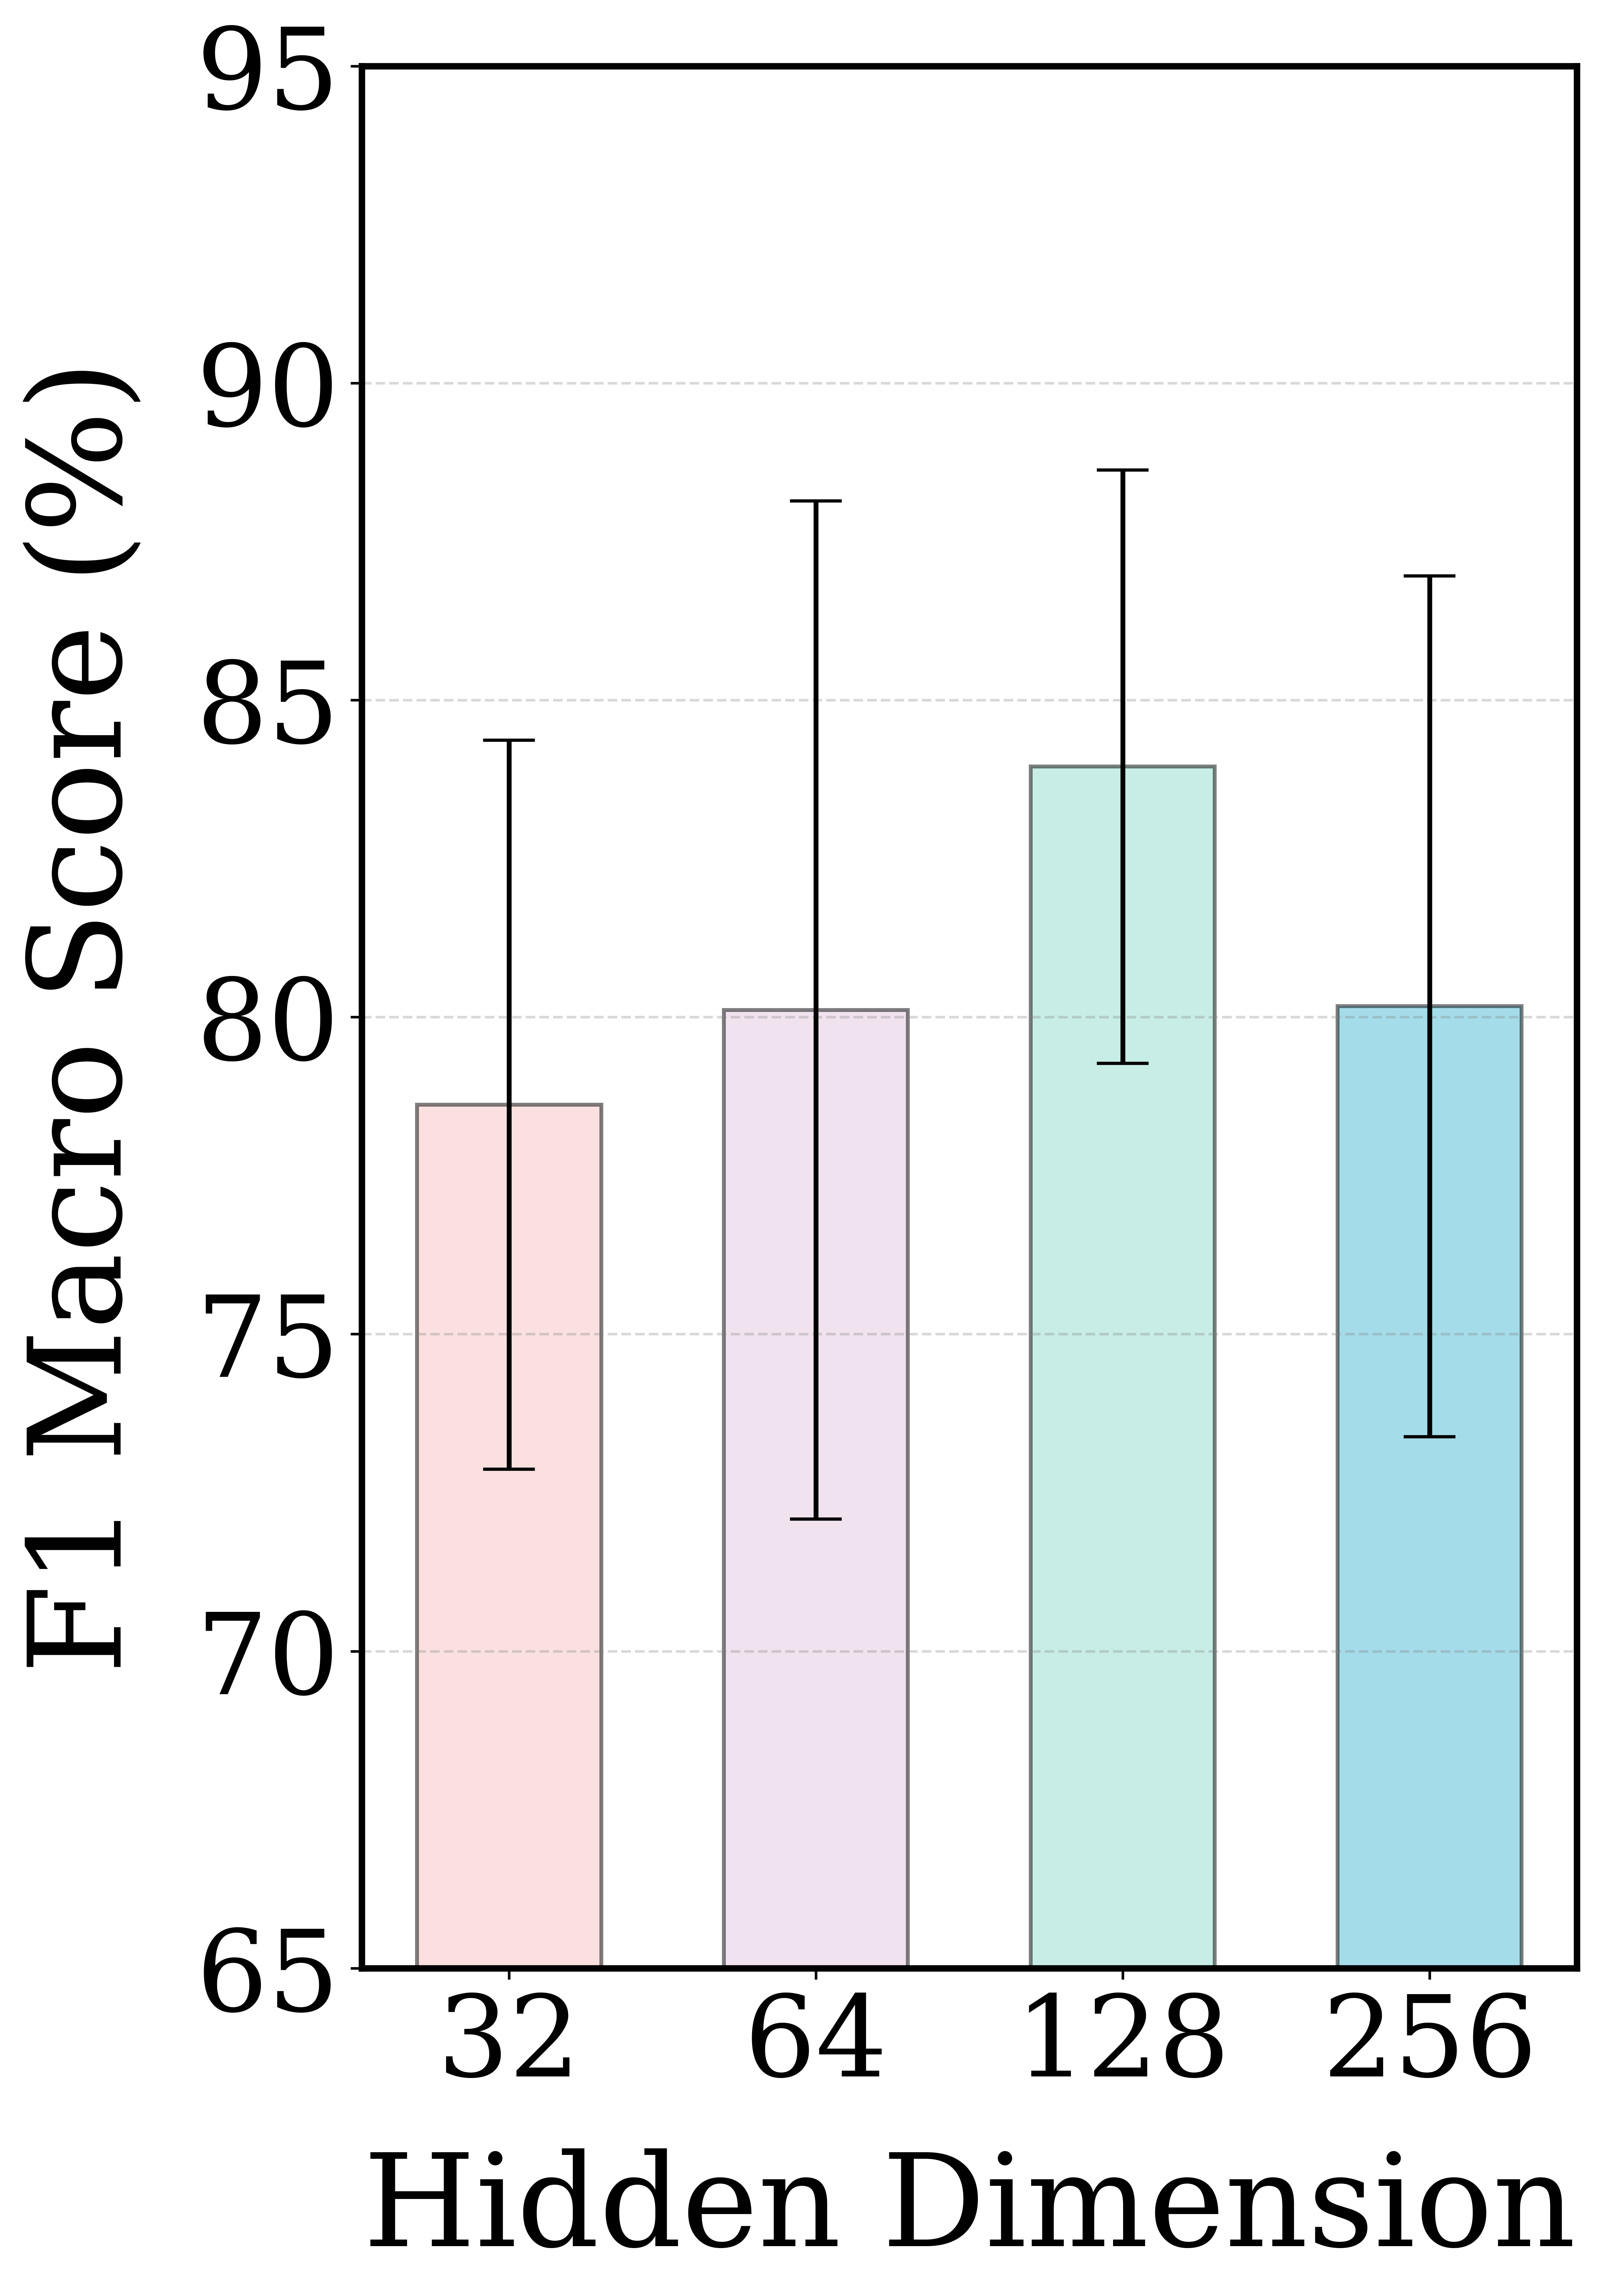

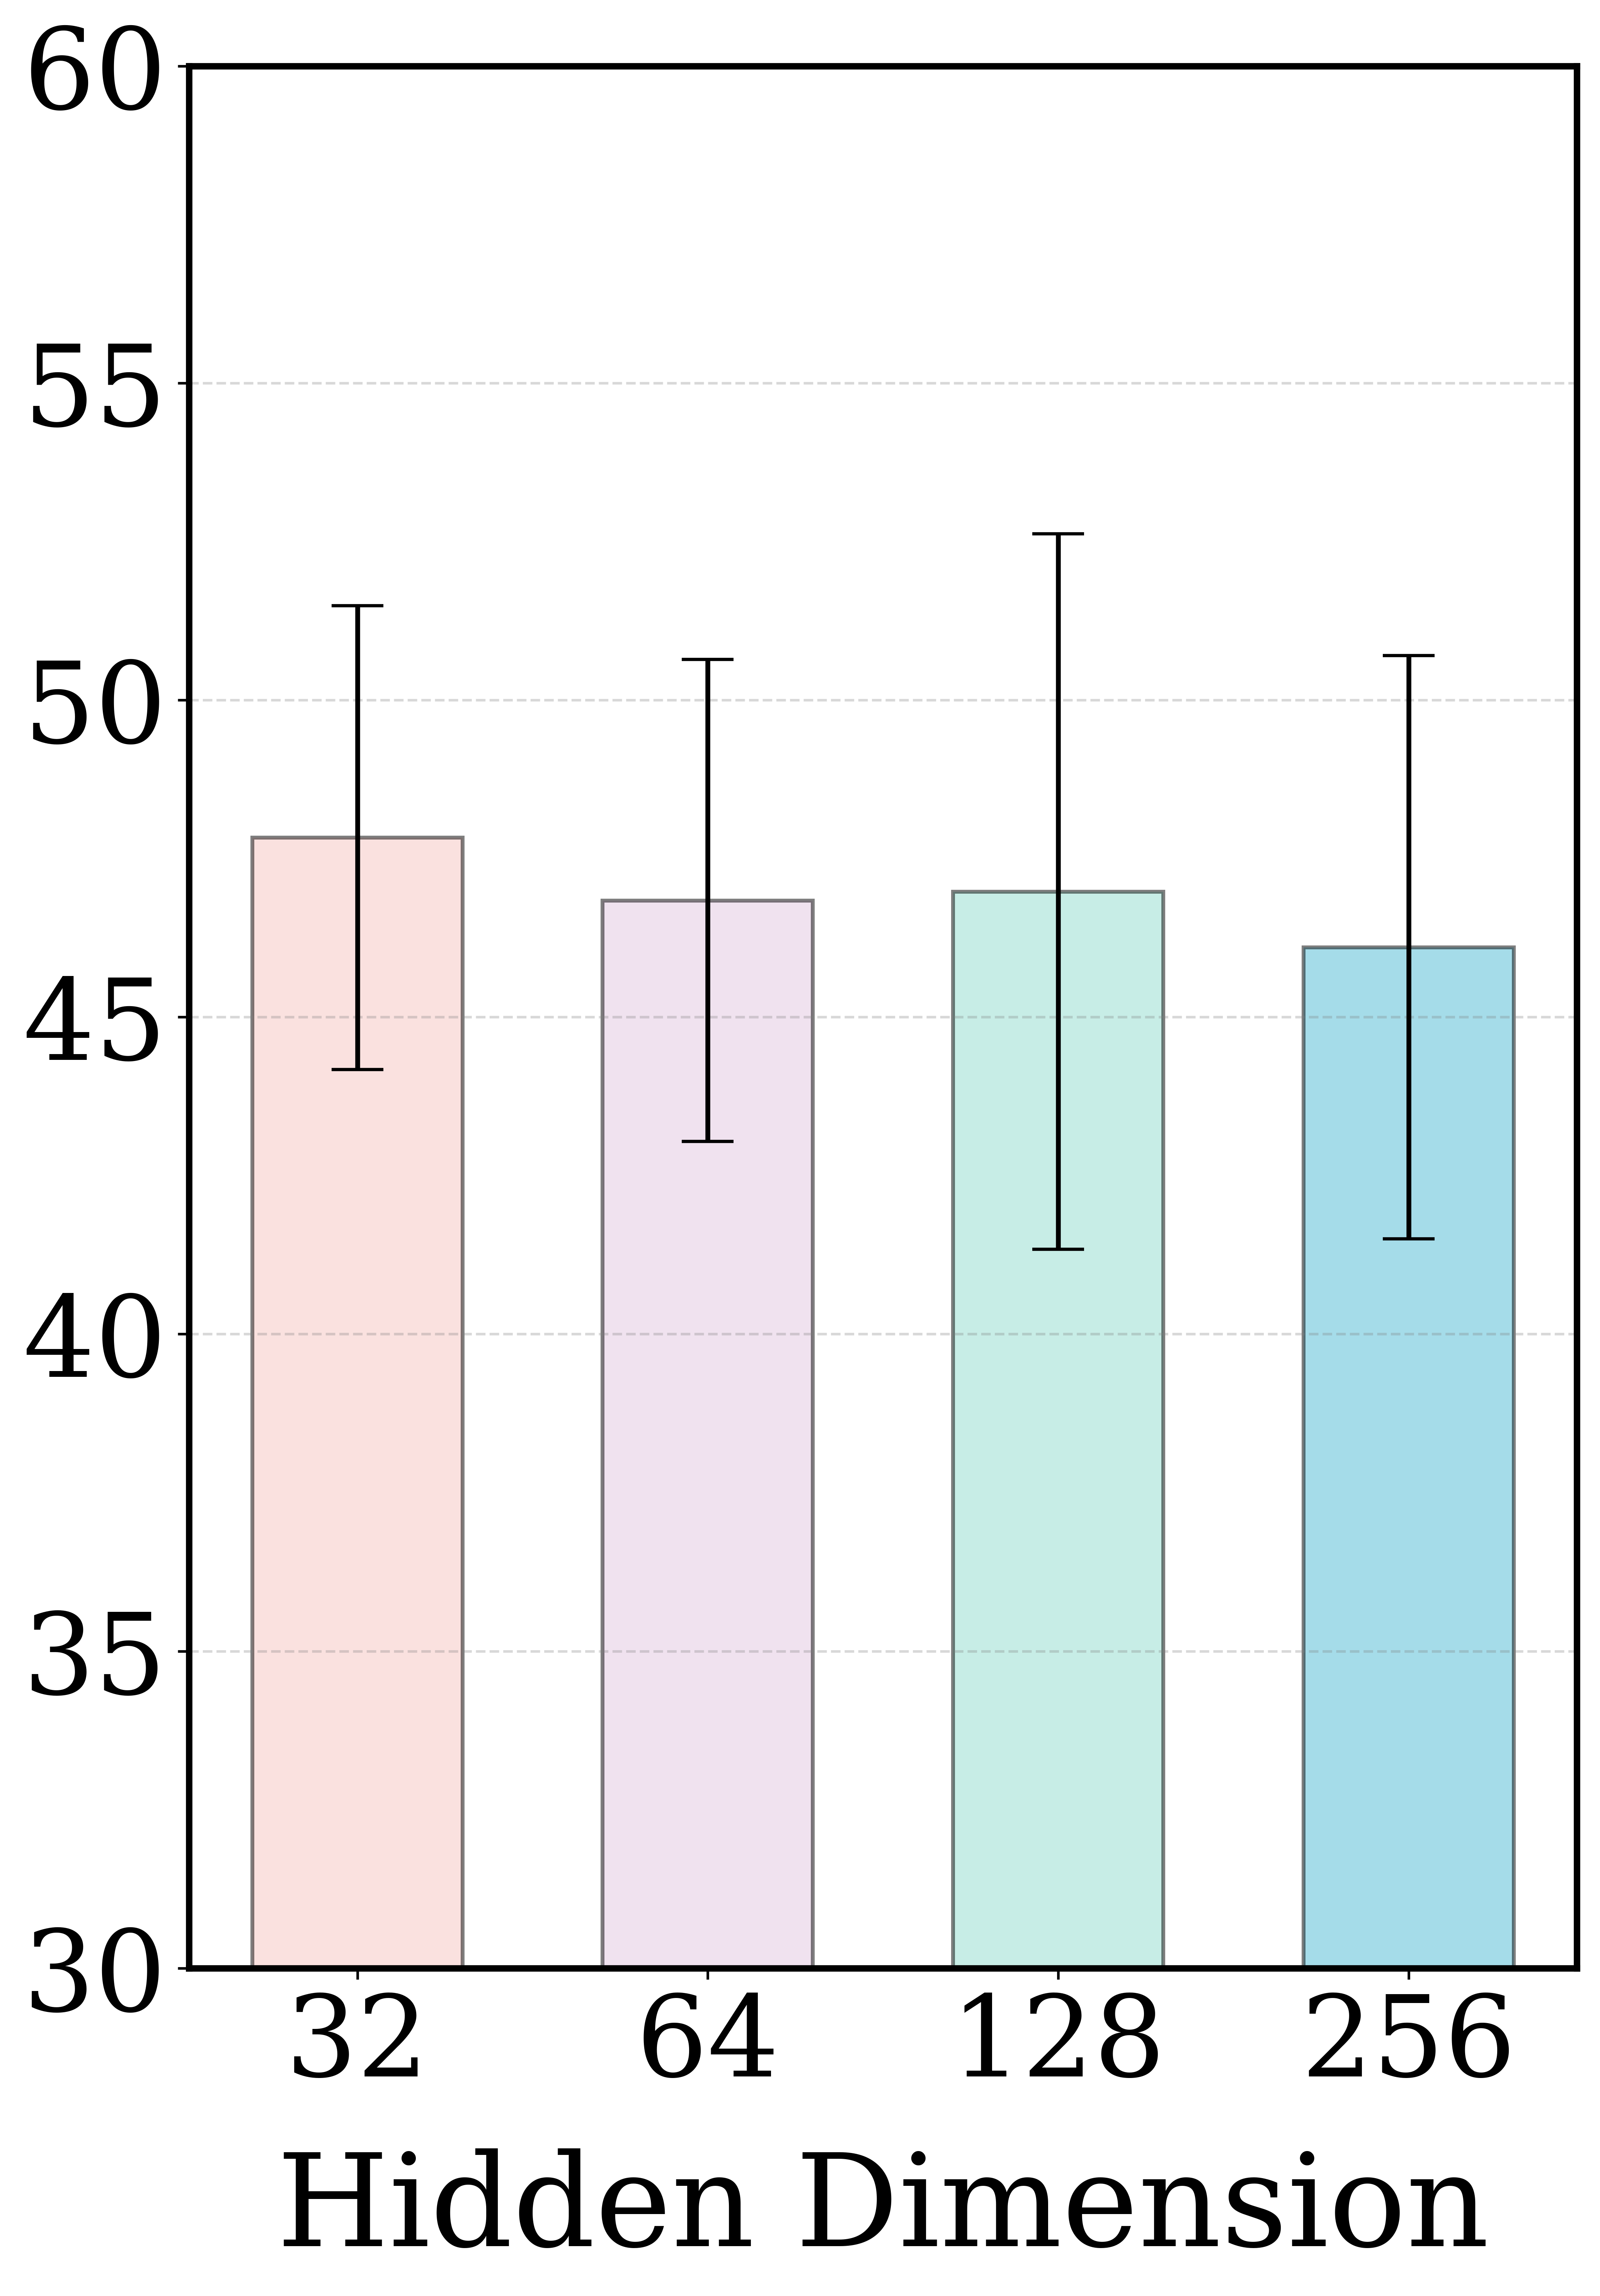

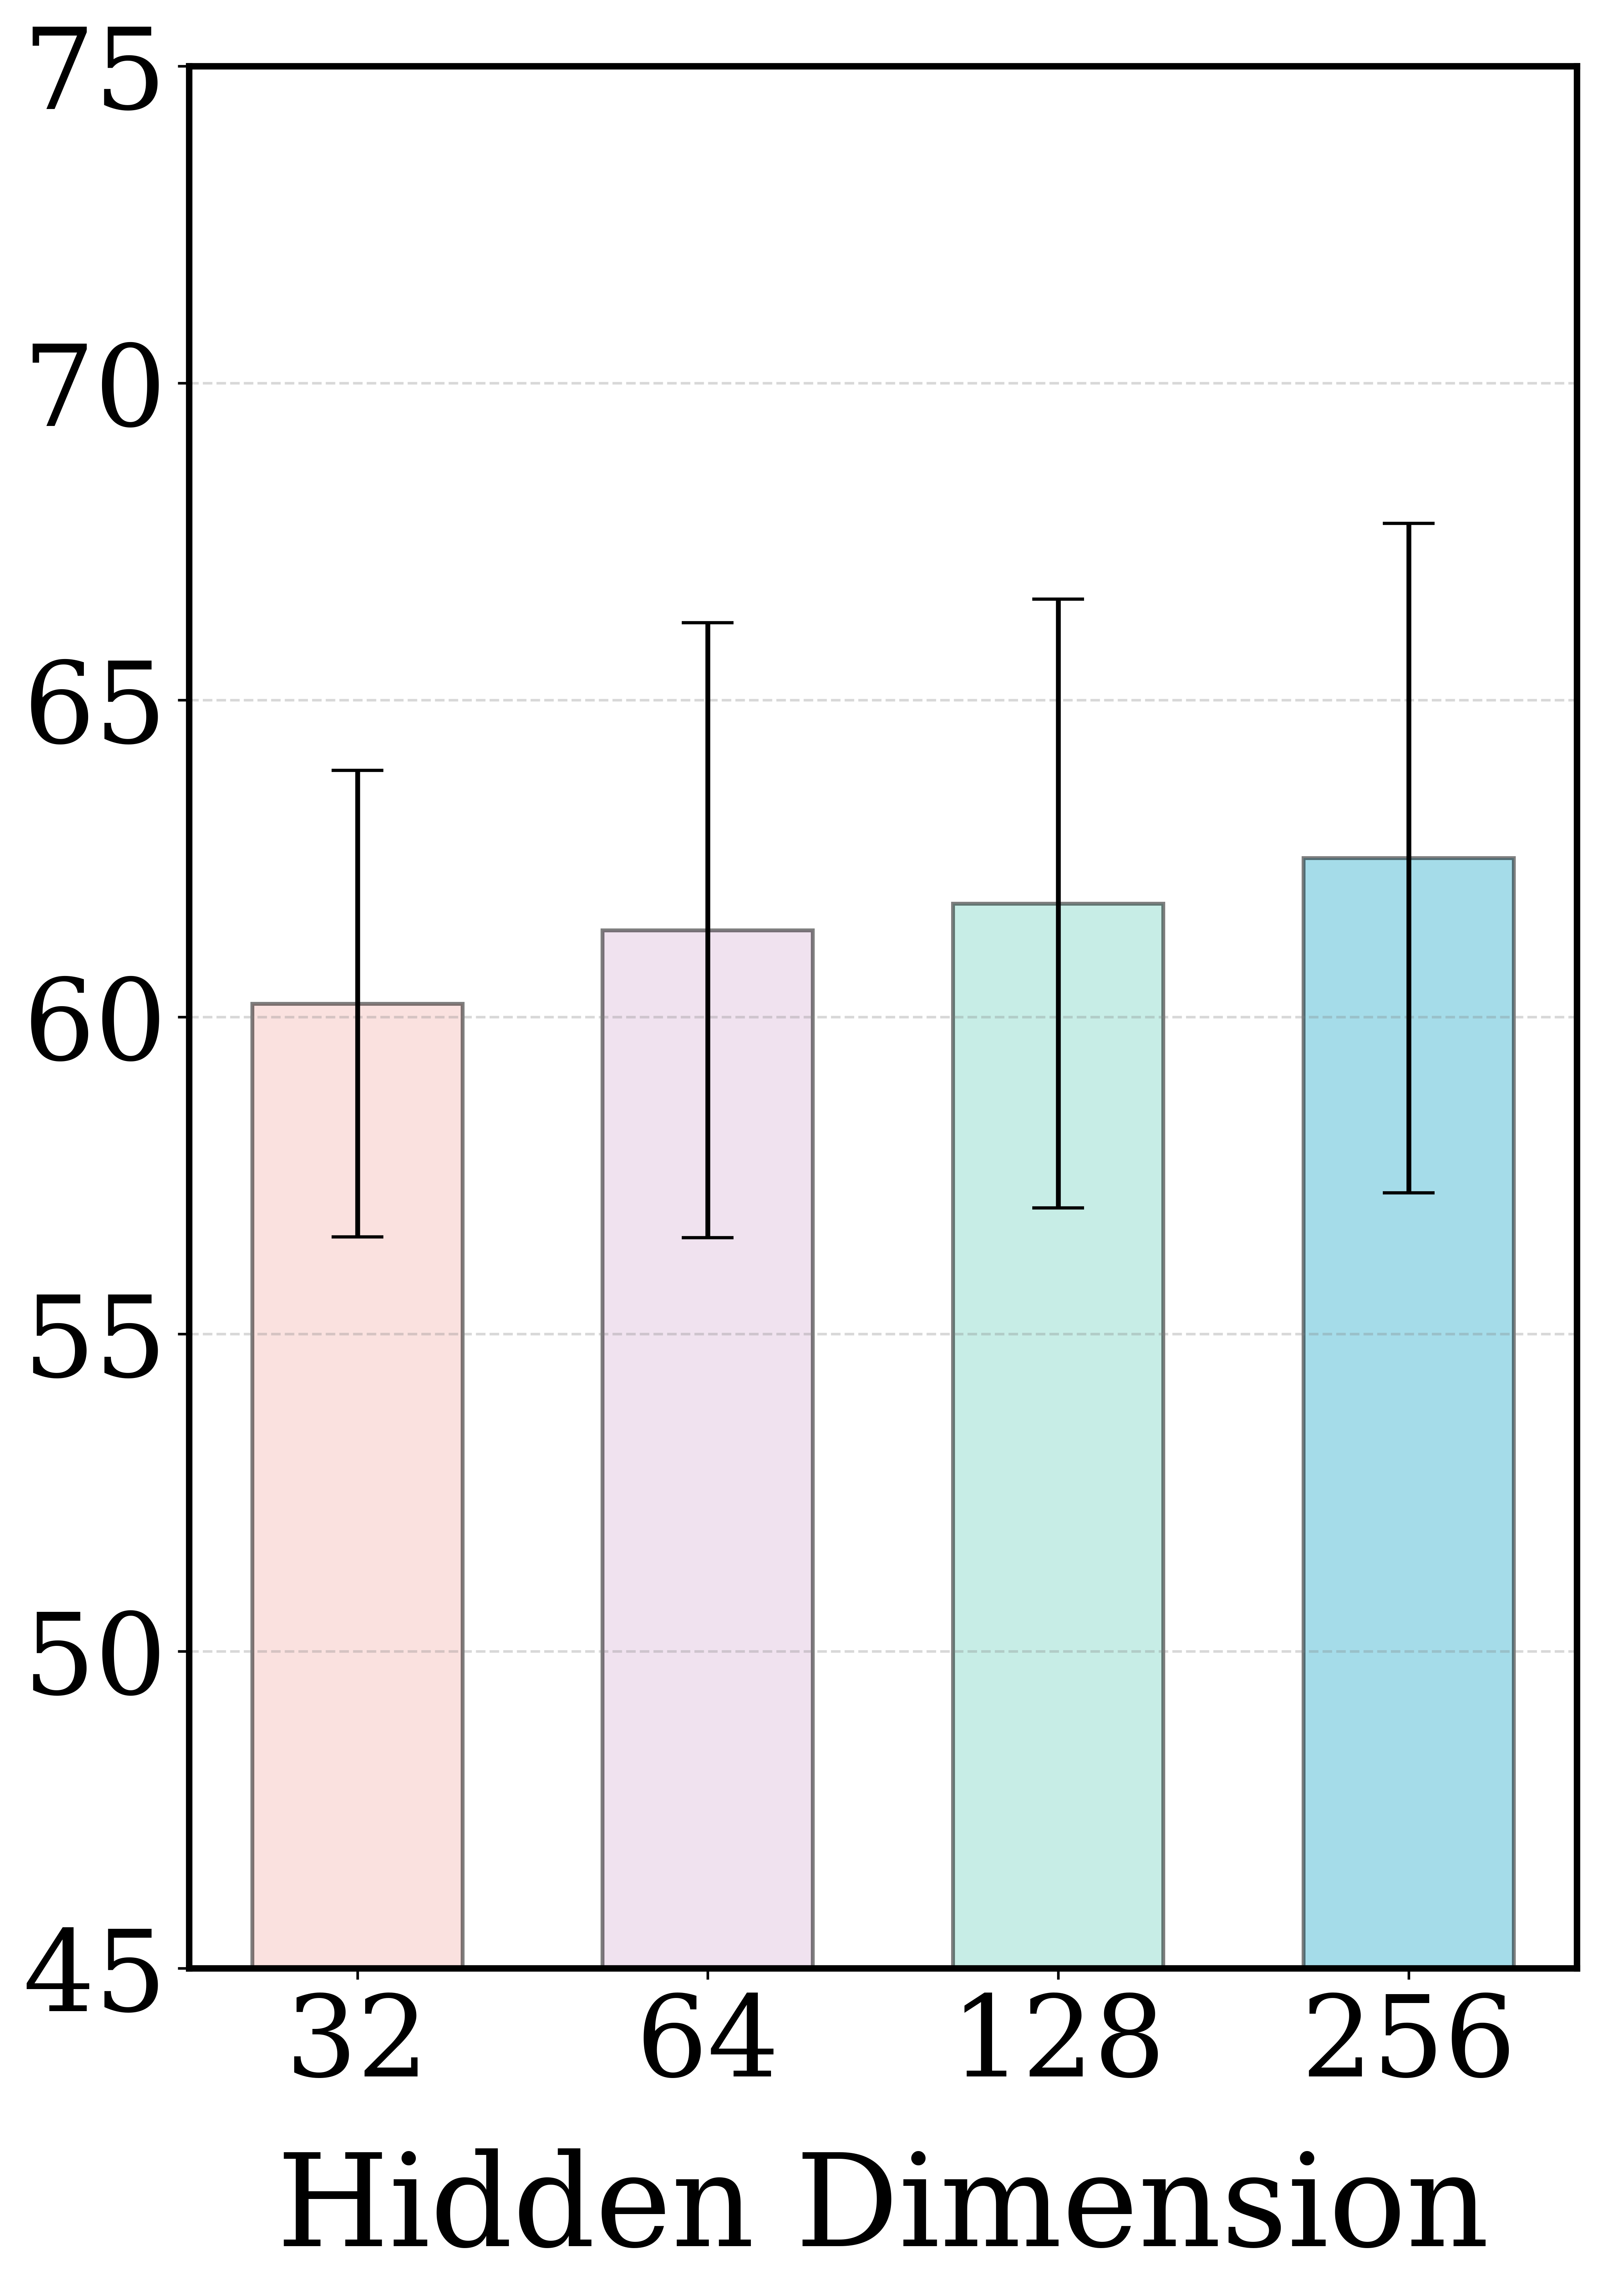

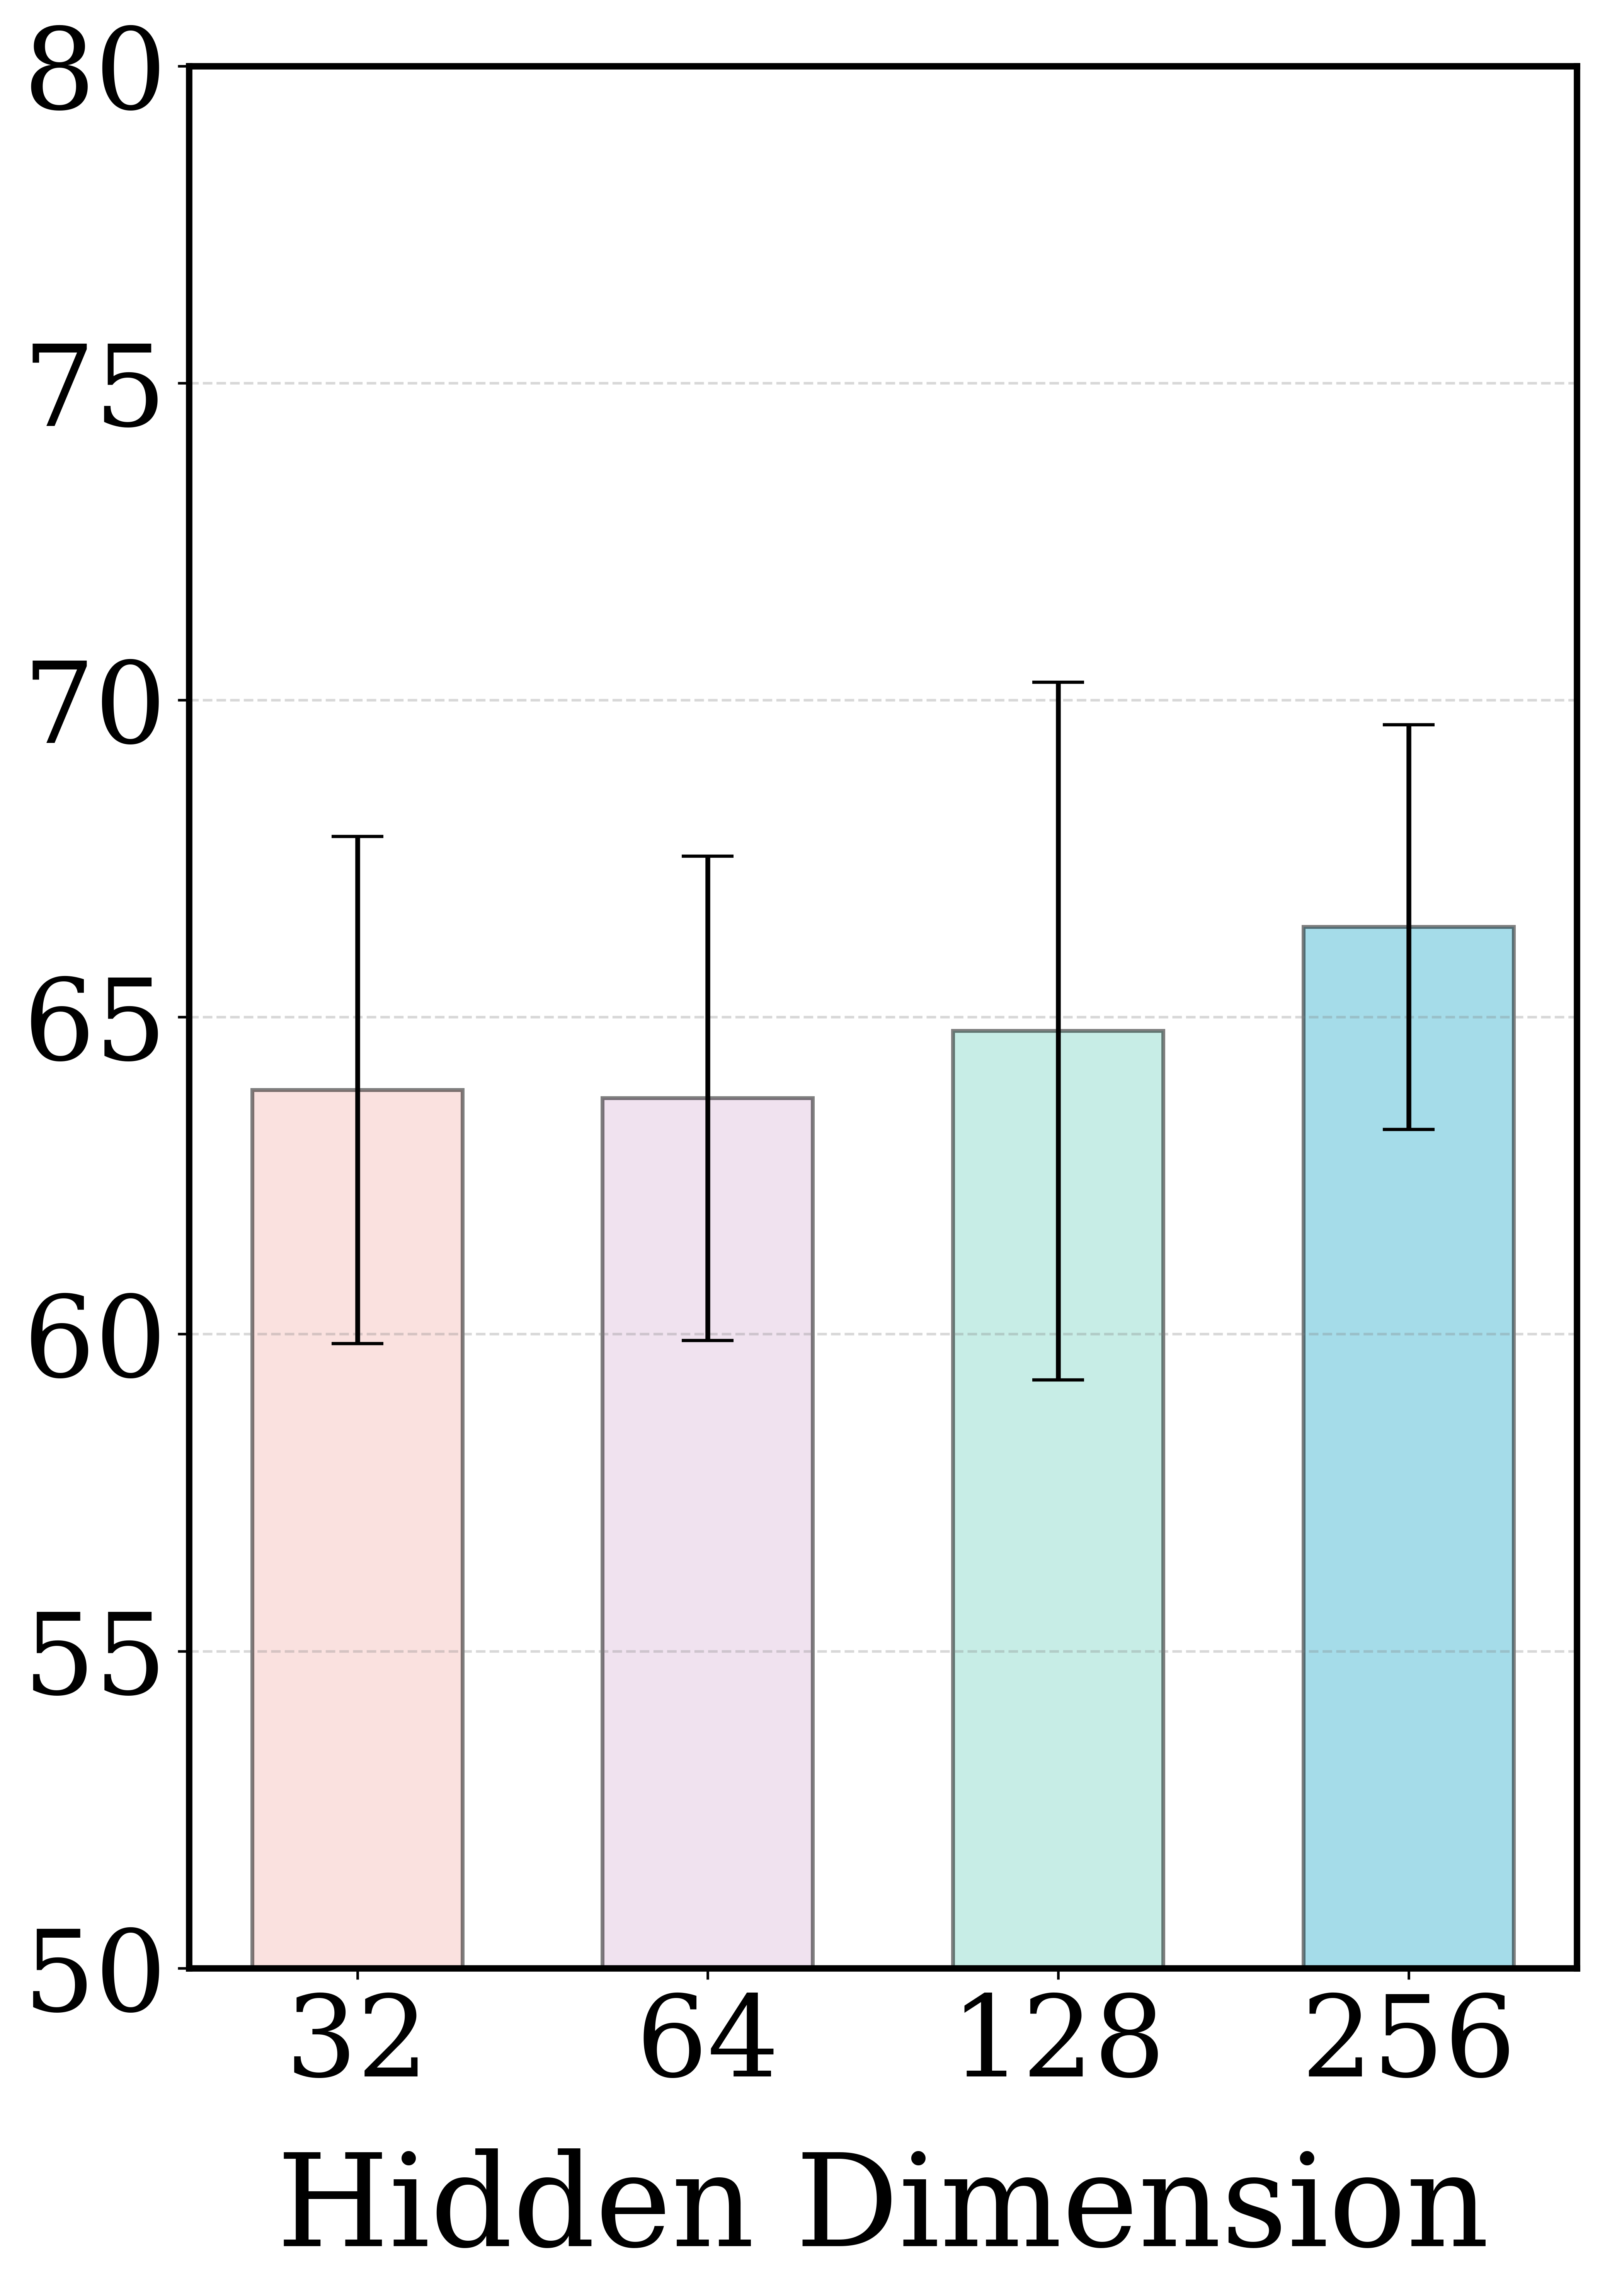

In [70]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
from scipy.interpolate import make_interp_spline
from scipy.ndimage import gaussian_filter1d
import numpy as np

def set_style():
    """Set global matplotlib style parameters"""
    mpl.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['axes.edgecolor'] = 'black'
    # 不在这里设置figsize，因为每张图单独设置更灵活

# Global configuration
PLOT_CONFIG = {
    'fontsize': 40,  # 标签字体大小
    'ticksize': 35,  # 刻度字体大小
    'titlesize': 40,
    'font': {
        'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 40,
    },
    'colors': {
        0: '#F7C4C1CC',  # 32
        2: '#91DDCFCC',  # 64
        1: '#E3C6E0CC',  # 128
        3: '#4DBBD5CC',  # 256
    },
    
    'linewidth': 4,
    'markersize': 26,
    'bar_width': 0.6,  # 柱状图宽度，单组时可以大一些
    'y_range': {"MUTAG": (65, 95),
               "PTC-MR": (30, 60),
               "DHFR": (45,75),
               "PROTEINS": (50,80)}, # Y轴范围
}

def create_bar_plot_data():
    """Create data for bar plot"""
    datasets = ['MUTAG', 'PTC-MR', 'DHFR', 'PROTEINS']
    hidden_dims = ['32', '64', '128', '256']
    
    # 数据格式: [dataset_index][hidden_dim_index] = (mean, std)
    data = [
        {  # MUTAG
            0: (78.62, 5.75),  # 32
            1: (80.11, 8.03),  # 64
            2: (83.95, 4.68),  # 128
            3: (80.17, 6.79),  # 256
        },
        {  # PTC-MR
            0: (47.83, 3.66),
            1: (46.84, 3.80),
            2: (46.98, 5.64),
            3: (46.10, 4.60),
        },
        {  # DHFR
            0: (60.21, 3.68),
            1: (61.37, 4.85),
            2: (61.79, 4.80),
            3: (62.51, 5.28),
        },
        {  # PROTEINS
            0: (63.85, 4.00),
            1: (63.72, 3.82),
            2: (64.78, 5.50),
            3: (66.42, 3.19),
        }
    ]
    
    return datasets, hidden_dims, data

def create_single_bar_plot(dataset_name, hidden_dims, dataset_data):
    """
    为单个数据集绘制一张柱状图
    :param dataset_name: 如 'MUTAG'
    :param hidden_dims: ['32', '64', '128', '256']
    :param dataset_data: 如 data[0]，即该数据集对应的 (mean, std) 字典
    """
    fig, ax = plt.subplots(figsize=(7, 10), dpi=600)

    x = np.arange(len(hidden_dims))  # 横轴是 hidden dimension 的索引
    means = [dataset_data[i][0] for i in range(len(hidden_dims))]
    stds = [dataset_data[i][1] for i in range(len(hidden_dims))]
    colors = [PLOT_CONFIG['colors'][i] for i in range(len(hidden_dims))]

    # 绘制柱状图
    bars = ax.bar(x, means, width=PLOT_CONFIG['bar_width'], 
                  yerr=stds, capsize=8,
                  color=colors, alpha=0.5,
                  edgecolor='black', linewidth=1.2)

    ax.set_xticks(x)
    ax.set_xticklabels(hidden_dims, fontsize=PLOT_CONFIG['ticksize'])

    
    ax.set_xlabel('Hidden Dimension', fontdict=PLOT_CONFIG['font'], labelpad=15)
    if dataset_name == "MUTAG":
        ax.set_ylabel(r'F1 Macro Score (%)', fontdict=PLOT_CONFIG['font'], labelpad=15)

    #ax.set_ylim(PLOT_CONFIG['y_range'][dataset_name])
    y_min, y_max = PLOT_CONFIG['y_range'][dataset_name]
    step = 5
    yticks = np.arange(y_min, y_max + 1, step)  # +1 是为了包含上限附近值

    ax.set_ylim(y_min, y_max)
    ax.set_yticks(yticks)
    ax.tick_params(axis='both', which='major', labelsize=PLOT_CONFIG['ticksize'])
    ax.grid(ls='--', color='gray', alpha=0.3, axis='y')


    plt.tight_layout()
    
    # 保存每张图，以数据集命名
    plt.savefig(f'figures/f1_macro_{dataset_name}.pdf', bbox_inches='tight')
    #plt.close()

def main():
    set_style()
    datasets, hidden_dims, data = create_bar_plot_data()

    for i, dataset in enumerate(datasets):
        dataset_data = data[i]  # 每个数据集对应一个 (mean,std) 字典
        create_single_bar_plot(dataset, hidden_dims, dataset_data)

if __name__ == "__main__":
    main()